# Project 46

In [27]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from ast import literal_eval
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [28]:
arxiv_data = pd.read_csv(
    "D:/datasets_CSV/arxiv_data.csv"
)
arxiv_data.head()


,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [29]:
print(f"There are {len(arxiv_data)} rows in the dataset")

There are 51774 rows in the dataset


In [30]:
total_duplicate_titles = sum(arxiv_data["titles"].duplicated())
print(f"There are {total_duplicate_titles} duplicate titles")

There are 12802 duplicate titles


In [31]:
arxiv_data = arxiv_data[~arxiv_data["titles"].duplicated()]
print(f"There are {len(arxiv_data)} rows in the deduplicated dataset.")

print(sum(arxiv_data["terms"].value_counts() == 1))

print(arxiv_data["terms"].nunique())

There are 38972 rows in the deduplicated dataset.
2321
3157


In [32]:
arxiv_data_filtered = arxiv_data.groupby("terms").filter(lambda x: len(x) > 1)
arxiv_data_filtered.shape

(36651, 3)

In [34]:
arxiv_data_filtered["terms"] = arxiv_data_filtered["terms"].apply(lambda x: literal_eval(x))
arxiv_data_filtered["terms"].values[:5]

array([list(['cs.CV', 'cs.LG']), list(['cs.CV', 'cs.AI', 'cs.LG']),
       list(['cs.CV', 'cs.AI']), list(['cs.CV']),
       list(['cs.CV', 'cs.LG'])], dtype=object)

In [35]:
test_split = 0.1
train_df, test_df = train_test_split(arxiv_data_filtered, test_size=test_split, 
                                     stratify=arxiv_data_filtered["terms"].values)
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

Number of rows in training set: 32985
Number of rows in validation set: 1833
Number of rows in test set: 1833


C:\Users\jatin\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [43]:
terms = tf.ragged.constant(train_df["terms"].values)
lookup = tf.keras.layers.StringLookup(output_mode="multi_hot")
lookup.adapt(terms)
vocab = lookup.get_vocabulary()

def invert_multi_hot(encoded_labels):
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(vocab, hot_indices)

print("Vocabulary:\n")
print(vocab)

Vocabulary:

['[UNK]', 'cs.CV', 'cs.LG', 'stat.ML', 'cs.AI', 'eess.IV', 'cs.RO', 'cs.CL', 'cs.NE', 'cs.CR', 'math.OC', 'eess.SP', 'cs.GR', 'cs.SI', 'cs.MM', 'cs.SY', 'cs.IR', 'cs.MA', 'eess.SY', 'cs.HC', 'math.IT', 'cs.IT', 'cs.DC', 'cs.CY', 'stat.AP', 'stat.TH', 'math.ST', 'stat.ME', 'eess.AS', 'cs.SD', 'q-bio.QM', 'q-bio.NC', 'cs.DS', 'cs.GT', 'cs.CG', 'cs.SE', 'cs.NI', 'I.2.6', 'stat.CO', 'math.NA', 'cs.NA', 'physics.chem-ph', 'cs.DB', 'q-bio.BM', 'cs.LO', 'cond-mat.dis-nn', '68T45', 'math.PR', 'cs.PL', 'physics.comp-ph', 'I.2.10', 'cs.CE', 'cs.AR', 'q-fin.ST', 'cond-mat.stat-mech', '68T05', 'quant-ph', 'math.DS', 'cs.CC', 'I.4.6', 'physics.data-an', 'physics.soc-ph', 'physics.ao-ph', 'econ.EM', 'cs.DM', 'q-bio.GN', 'physics.med-ph', 'astro-ph.IM', 'I.4.8', 'math.AT', 'cs.PF', 'I.4', 'q-fin.TR', 'cs.FL', 'I.5.4', 'I.2', '68U10', 'physics.geo-ph', 'hep-ex', '68T10', 'physics.optics', 'cond-mat.mtrl-sci', 'physics.flu-dyn', 'math.AP', 'I.4; I.5', 'I.4.9', 'I.2.6; I.2.8', 'I.2.10; I.4;

In [44]:
sample_label = train_df["terms"].iloc[0]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

Original label: ['cs.CV']
Label-binarized representation: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [45]:
train_df["summaries"].apply(lambda x: len(x.split(" "))).describe()

count    32985.000000
mean       156.547643
std         41.407100
min          5.000000
25%        128.000000
50%        155.000000
75%        183.000000
max        462.000000
Name: summaries, dtype: float64

In [46]:
max_seqlen = 150
batch_size = 128
padding_token = "<pad>"
auto = tf.data.AUTOTUNE

def make_dataset(dataframe, is_train=True):
    labels = tf.ragged.constant(dataframe["terms"].values)
    label_binarized = lookup(labels).numpy()
    dataset = tf.data.Dataset.from_tensor_slices((dataframe["summaries"].values, label_binarized))
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

In [47]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [48]:
text_batch, label_batch = next(iter(train_dataset))
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    print(" ")

Abstract: b'Feature selection and regularization are becoming increasingly prominent\ntools in the efforts of the reinforcement learning (RL) community to expand the\nreach and applicability of RL. One approach to the problem of feature selection\nis to impose a sparsity-inducing form of regularization on the learning method.\nRecent work on $L_1$ regularization has adapted techniques from the supervised\nlearning literature for use with RL. Another approach that has received renewed\nattention in the supervised learning community is that of using a simple\nalgorithm that greedily adds new features. Such algorithms have many of the\ngood properties of the $L_1$ regularization methods, while also being extremely\nefficient and, in some cases, allowing theoretical guarantees on recovery of\nthe true form of a sparse target function from sampled data. This paper\nconsiders variants of orthogonal matching pursuit (OMP) applied to\nreinforcement learning. The resulting algorithms are analyz

In [49]:
vocabulary = set()
train_df["summaries"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

153413


In [51]:
text_vectorizer = layers.TextVectorization(max_tokens=vocabulary_size, ngrams=2, output_mode = "tf_idf")
with tf.device("/CPU:0"):
    text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

train_dataset = train_dataset.map(lambda text, label: (text_vectorizer(text), label), 
                                  num_parallel_calls=auto).prefetch(auto)
validation_dataset = validation_dataset.map(lambda text, label: (text_vectorizer(text), label), 
                                           num_parallel_calls=auto).prefetch(auto)
test_dataset = test_dataset.map(lambda text, label: (text_vectorizer(text), label), 
                                num_parallel_calls=auto).prefetch(auto)

In [52]:
def make_model():
    shallow_mlp_model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(lookup.vocabulary_size(), activation="sigmoid"),
    ])
    return shallow_mlp_model

In [53]:
epochs = 20
shallow_mlp_model = make_model()
shallow_mlp_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["categorical_accuracy"])
history = shallow_mlp_model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs)

Epoch 1/20
258/258 [==============================] - 195s 737ms/step - loss: 0.0339 - categorical_accuracy: 0.8579 - val_loss: 0.0188 - val_categorical_accuracy: 0.8876
Epoch 2/20
258/258 [==============================] - 189s 732ms/step - loss: 0.0034 - categorical_accuracy: 0.8844 - val_loss: 0.0246 - val_categorical_accuracy: 0.8778
Epoch 3/20
258/258 [==============================] - 190s 737ms/step - loss: 7.8998e-04 - categorical_accuracy: 0.8575 - val_loss: 0.0315 - val_categorical_accuracy: 0.8669
Epoch 4/20
258/258 [==============================] - 191s 740ms/step - loss: 2.8914e-04 - categorical_accuracy: 0.8389 - val_loss: 0.0356 - val_categorical_accuracy: 0.8549
Epoch 5/20
258/258 [==============================] - 189s 733ms/step - loss: 1.5262e-04 - categorical_accuracy: 0.8408 - val_loss: 0.0388 - val_categorical_accuracy: 0.8554
Epoch 6/20
258/258 [==============================] - 193s 745ms/step - loss: 9.4270e-05 - categorical_accuracy: 0.8431 - val_loss: 0.0419

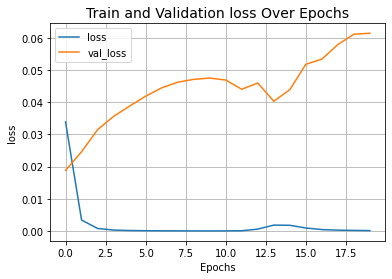

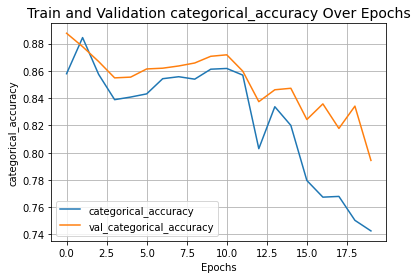

In [55]:
def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_"+item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()

plot_result("loss")
plot_result("categorical_accuracy")

In [56]:
_, categorical_acc = shallow_mlp_model.evaluate(test_dataset)
print(f"Categorical accuracy on the test set: {round(categorical_acc * 100, 2)}%.")

15/15 [==============================] - 2s 125ms/step - loss: 0.0592 - categorical_accuracy: 0.8161
Categorical accuracy on the test set: 81.61%.


In [57]:
model_for_inference = keras.Sequential([text_vectorizer, shallow_mlp_model])

inference_dataset = make_dataset(test_df.sample(100), is_train=False)
text_batch, label_batch = next(iter(inference_dataset))
predicted_probabilities = model_for_inference.predict(text_batch)

for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    predicted_proba = [proba for proba in predicted_probabilities[i]]
    top_3_labels = [
        x for _, x in sorted(zip(predicted_probabilities[i], lookup.get_vocabulary()), key=lambda pair: pair[0], 
                            reverse=True,)
    ][:3]
    print(f"Predicted Label(s): ({', '.join([label for label in top_3_labels])})")
    print(" ")

Abstract: b'Accurate pedestrian classification and localization have received\nconsiderable attention due to their wide applications such as security\nmonitoring, autonomous driving, etc. Although pedestrian detectors have made\ngreat progress in recent years, the fixed Intersection over Union (IoU) based\nassignment-regression manner still limits their performance. Two main factors\nare responsible for this: 1) the IoU threshold faces a dilemma that a lower one\nwill result in more false positives, while a higher one will filter out the\nmatched positives; 2) the IoU-based GT-Proposal assignment suffers from the\ninconsistent supervision problem that spatially adjacent proposals with similar\nfeatures are assigned to different ground-truth boxes, which means some very\nsimilar proposals may be forced to regress towards different targets, and thus\nconfuses the bounding-box regression when predicting the location results. In\nthis paper, we first put forward the question that \\textbf{

# Project 47

In [59]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from tensorflow import keras

In [60]:
label_map = {"Contradictory": 0, "Implies":1, "NoEntailment":2}

In [61]:
image_base_path = keras.utils.get_file("tweet_images", "https://github.com/sayakpaul/Multimodal-Entailment-Baseline/releases/download/v1.0.0/tweet_images.tar.gz", 
                                      untar=True)

344285184/344273442 [==============================] - 298s 1us/step


In [62]:
df = pd.read_csv("https://github.com/sayakpaul/Multimodal-Entailment-Baseline/raw/main/csvs/tweets.csv")
df.sample(10)

,id_1,text_1,image_1,id_2,text_2,image_2,label
723,1364743171025027072,TONIGHT on @WEWS it’s @TheGoldbergsABC at 8 fo...,http://pbs.twimg.com/media/EvCKrooUcAMX3Tu.jpg,1372360866876825602,TONIGHT on @WEWS it’s @TheGoldbergsABC at 8 fo...,http://pbs.twimg.com/media/Ewua75XXEAIf478.jpg,NoEntailment
1122,1374670371694243845,Current Conditions over the Mtn Passes #kiro7...,http://pbs.twimg.com/media/ExPPZ-uWQAYlUWG.jpg,1375400832364068867,Current Conditions over the Mtn Passes #kiro7t...,http://pbs.twimg.com/media/ExZnwTxWQAAn1Z3.jpg,NoEntailment
1355,1334396755006418945,Bought a Christmas present for myself #Obama h...,http://pbs.twimg.com/media/EoS6xh-W4AEVoc5.jpg,1343180981105274881,"Santa Clause gave me this for Christmas, I can...",http://pbs.twimg.com/media/EqPv-4qXMAIaeaN.jpg,NoEntailment
1004,1379116840941711365,AFTERNOON SHOWERS: Rain is on the lighter side...,http://pbs.twimg.com/media/EyObbysW8AUH8Jh.jpg,1380204547570827271,SHOWERS TAPER: While rain chances stick around...,http://pbs.twimg.com/media/Eyd4t7DWEAApk3j.jpg,NoEntailment
109,1364091314929819651,Aircraft #N22PP operated by U.S. Park Police i...,http://pbs.twimg.com/media/Eu450g6WYAEO0bL.jpg,1381758627111911427,Aircraft #N33PP operated by U.S. Park Police i...,http://pbs.twimg.com/media/Eyz-JYsWYAAh7l6.jpg,Contradictory
1041,1354954834600837124,UNIVERSITY: The voting period for Make-Up Elec...,http://pbs.twimg.com/media/Es3EPccU0AwCB7g.jpg,1356912681584758784,JUST IN: The voting period for Make-up Electio...,http://pbs.twimg.com/media/EtS45GcUYAItO8i.jpg,NoEntailment
348,1375537480565415942,"Copper breaks $4.30 per lb &amp; $9,000 per T ...",http://pbs.twimg.com/media/Exbhuf_W8AUMHZ9.jpg,1381524549506830336,The mining world is relatively small and it is...,http://pbs.twimg.com/media/EywpQNCXMAAwHWD.jpg,NoEntailment
178,1360624386013884417,$FLOW.. T1 hit .. T2 comming soon\n#Bitcoin #E...,http://pbs.twimg.com/media/EuHoeoWXMAc7bV6.png,1376544958405038084,$LTC Normally we should see one more push down...,http://pbs.twimg.com/media/Exp35zcWUAcMOel.png,NoEntailment
898,1344186326728507392,M1.4 #earthquake (#potres) strikes 26 km S of ...,http://pbs.twimg.com/media/EqeBItLXIAEktJe.png,1344358109838499840,M1.2 #earthquake (#potres) strikes 28 km S of ...,http://pbs.twimg.com/media/Eqgek3MXIAYHtW7.png,NoEntailment
688,1336995367196401666,2020.12.5\nHONDA VTEC ONEMAKE RACE Rd.5\n\n#セン...,http://pbs.twimg.com/media/Eo32MgzVoAIhnj9.jpg,1339210226210197507,2020.12.5\nHONDA VTEC ONEMAKE RACE Rd.5\n\n#セン...,http://pbs.twimg.com/media/EpXUmbqVgAA8R70.jpg,NoEntailment


In [63]:
images_one_paths = []
images_two_paths = []
for idx in range(len(df)):
    current_row = df.iloc[idx]
    id_1 = current_row["id_1"]
    id_2 = current_row["id_2"]
    extentsion_one = current_row["image_1"].split(".")[-1]
    extentsion_two = current_row["image_2"].split(".")[-1]
    
    image_one_path = os.path.join(image_base_path, str(id_1) + f".{extentsion_one}")
    image_two_path = os.path.join(image_base_path, str(id_2) + f".{extentsion_two}")
    
    images_one_paths.append(image_one_path)
    images_two_paths.append(image_two_path)
    
df["image_1_path"] = images_one_paths
df["image_2_path"] = images_two_paths

df["label_idx"] = df["label"].apply(lambda x: label_map[x])

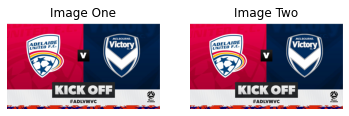

Text one: 👟 KICK OFF @ MARDEN SPORTS COMPLEX

We're underway in the Round 6 opener!

📺: @Foxtel, @kayosports
📱: My Football Live app https://t.co/wHSpvQaoGC

#WLeague #ADLvMVC #AUFC #MVFC https://t.co/3Smp8KXm8W
Text two: 👟 KICK OFF @ MARSDEN SPORTS COMPLEX

We're underway in sunny Adelaide!

📺: @Foxtel, @kayosports
📱: My Football Live app https://t.co/wHSpvQaoGC

#ADLvCBR #WLeague #AUFC #UnitedAlways https://t.co/fG1PyLQXM4
Label: NoEntailment


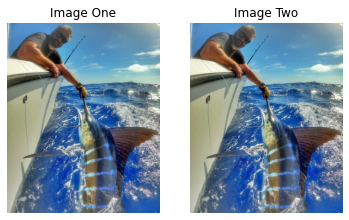

Text one: Exmouth, Aus - Peak Sportfishing released 2 Blue Marlin and a Striped Marlin. https://t.co/ZUcuKGxKiU
Text two: Exmouth, Aus - Peak Sportfishing released 2 Sailfish and a Black Marlin. https://t.co/Do2WqTsuwR
Label: NoEntailment


In [64]:
def visualize(idx):
    current_row = df.iloc[idx]
    image_1 = plt.imread(current_row["image_1_path"])
    image_2 = plt.imread(current_row["image_2_path"])
    text_1 = current_row["text_1"]
    text_2 = current_row["text_2"]
    label = current_row["label"]
    
    plt.subplot(1, 2, 1)
    plt.imshow(image_1)
    plt.axis("off")
    plt.title("Image One")
    plt.subplot(1, 2, 2)
    plt.imshow(image_1)
    plt.axis("off")
    plt.title("Image Two")
    plt.show()
    
    print(f"Text one: {text_1}")
    print(f"Text two: {text_2}")
    print(f"Label: {label}")
random_idx = np.random.choice(len(df))
visualize(random_idx)

random_idx = np.random.choice(len(df))
visualize(random_idx)

In [65]:
df["label"].value_counts()

NoEntailment     1182
Contradictory     109
Implies           109
Name: label, dtype: int64

In [66]:
train_df, test_df = train_test_split(df, test_size=0.1, stratify=df["label"].values, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.05, stratify=train_df["label"].values, random_state=42)
print(f"Total training examples: {len(train_df)}")
print(f"Total validation examples: {len(val_df)}")
print(f"Total test examples: {len(test_df)}")

Total training examples: 1197
Total validation examples: 63
Total test examples: 140


In [67]:
bert_model_path = ("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1")
bert_preprocess_path = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

In [72]:
def make_bert_preprocessing_model(sentence_features, seq_length=128):
    input_segments = [
        tf.keras.layers.Input(shape=(), dtype=tf.string, name=ft)
        for ft in sentence_features
    ]
    bert_preprocess = hub.load(bert_preprocess_path)
    tokenizer = hub.KerasLayer(bert_preprocess.tokenize, name="tokenizer")
    segments = [tokenizer(s) for s in input_segments]
    truncated_segments = segments
    packer = hub.KerasLayer(bert_preprocess.bert_pack_inputs, arguments=dict(seq_length=seq_length), name="packer")
    model_inputs = packer(truncated_segments)
    return keras.Model(input_segments, model_inputs)

bert_preprocess_model = make_bert_preprocessing_model(["text_1", "text_2"])
keras.utils.plot_model(bert_preprocess_model, show_shapes=True, show_dtype=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [74]:
idx = np.random.choice(len(train_df))
row = train_df.iloc[idx]
sample_text_1, sample_text_2 = row["text_1"],row["text_2"]
print(f"Text 1: {sample_text_1}")
print(f"Text 2: {sample_text_2}")

test_text = [np.array([sample_text_1]), np.array([sample_text_2])]
text_preprocessed = bert_preprocess_model(test_text)

print("keys: ", list(text_preprocessed.keys()))
print("Shape Word Ids:", text_preprocessed["input_word_ids"].shape)
print("Word Ids:", text_preprocessed["input_word_ids"][0, :16])
print("Shape Mask:", text_preprocessed["input_mask"].shape)
print("Input Mask:", text_preprocessed["input_mask"][0, :16])
print("Shape Type Ids:", text_preprocessed["input_type_ids"].shape)
print("Type Ids:", text_preprocessed["input_type_ids"][0, :16])

Text 1: Today the message of freedom goes to Kisoro, Rubanda, Rukiga and Kabale.

#WeAreRemovingADictator https://t.co/bYBawpXXVx
Text 2: Today the message of freedom is going to the people of KIRUHURA KAZO, KITAGWENDA &amp; IBANDA.

#WeAreRemovingADictator ✊ https://t.co/RhFepJtJ6G
keys:  ['input_mask', 'input_type_ids', 'input_word_ids']
Shape Word Ids: (1, 128)
Word Ids: tf.Tensor(
[  101  2651  1996  4471  1997  4071  3632  2000 11382 21748  2080  1010
 14548 13832  1010 21766], shape=(16,), dtype=int32)
Shape Mask: (1, 128)
Input Mask: tf.Tensor([1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1], shape=(16,), dtype=int32)
Shape Type Ids: (1, 128)
Type Ids: tf.Tensor([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(16,), dtype=int32)


In [75]:
def dataframe_to_dataset(dataframe):
    columns = ["image_1_path", "image_2_path", "text_1", "text_2", "label_idx"]
    dataframe = dataframe[columns].copy()
    labels = dataframe.pop("label_idx")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [79]:
resize = (128, 128)
bert_input_features = ["input_word_ids", "input_type_ids", "input_mask"]

def preprocess_image(image_path):
    extension = tf.strings.split(image_path)[-1]
    image = tf.io.read_file(image_path)
    if extension == b"jpg":
        image = tf.image.decode_jpeg(image, 3)
    else:
        image = tf.image.decode_png(image, 3)
    image = tf.image.resize(image, resize)
    return image

def preprocess_text(text_1, text_2):
    text_1 = tf.convert_to_tensor([text_1])
    text_2 = tf.convert_to_tensor([text_2])
    output = bert_preprocess_model([text_1, text_2])
    output = {feature: tf.squeeze(output[feature]) for feature in bert_input_features}
    return output

def preprocess_text_and_image(sample):
    image_1 = preprocess_image(sample["image_1_path"])
    image_2 = preprocess_image(sample["image_2_path"])
    text = preprocess_text(sample["text_1"], sample["text_2"])
    return {"image_1":image_1, "image_2":image_2, "text":text}

In [80]:
batch_size = 32
auto = tf.data.AUTOTUNE

def prepare_dataset(dataframe, training=True):
    ds = dataframe_to_dataset(dataframe)
    if training:
        ds = ds.shuffle(len(train_df))
    ds = ds.map(lambda x, y: (preprocess_text_and_image(x), y)).cache()
    ds = ds.batch(batch_size).prefetch(auto)
    return ds

train_ds = prepare_dataset(train_df)
validation_ds = prepare_dataset(val_df, False)
test_ds = prepare_dataset(test_df, False)

In [81]:
def project_embeddings(embeddings, num_projection_layers, projection_dims, dropout_rate):
    projected_embeddings = keras.layers.Dense(units=projection_dims)(embeddings)
    for _ in range(num_projection_layers):
        x = tf.nn.gelu(projected_embeddings)
        x = tf.keras.layers.Dense(projection_dims)(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)
        x = tf.keras.layers.Add()([projected_embeddings, x])
        projected_embeddings = keras.layers.LayerNormalization()(x)
    return projected_embeddings

In [82]:
def create_vision_encoder(num_projection_layers, projection_dims, dropout_rate, trainable=False):
    resnet_v2 = keras.applications.ResNet50V2(include_top=False, weights="imagenet", pooling="avg")
    for layer in resnet_v2.layers:
        layer.trainable = trainable
    
    image_1 = keras.Input(shape=(128, 128, 3), name="image_1")
    image_2 = keras.Input(shape=(128, 128, 3), name="image_2")
    
    preprocessed_1 = keras.applications.resnet_v2.preprocess_input(image_1)
    preprocessed_2 = keras.applications.resnet_v2.preprocess_input(image_2)
    
    embeddings_1 = resnet_v2(preprocessed_1)
    embeddings_2 = resnet_v2(preprocessed_2)
    embeddings = keras.layers.Concatenate()([embeddings_1, embeddings_2])
    
    outputs = project_embeddings(embeddings, num_projection_layers, projection_dims, dropout_rate)
    return keras.Model([image_1, image_2], outputs = outputs, name="vision_encoder")

In [86]:
def create_text_encoder(num_projection_layers, projection_dims, dropout_rate, trainable=False):
    bert = hub.KerasLayer(bert_model_path, name="bert",)
    bert.trainable = trainable
    
    bert_input_features = ["input_type_ids", "input_mask", "input_word_ids"]
    inputs = {feature: keras.Input(shape=(128, ), dtype=tf.int32, name=feature) for feature in bert_input_features}
    
    embeddings = bert(inputs)["pooled_output"]
    
    outputs = project_embeddings(embeddings, num_projection_layers, projection_dims, dropout_rate)
    return keras.Model(inputs, outputs, name="text_encoder")

In [87]:
def create_multimodal_model(num_projection_layers=1, projection_dims=256, dropout_rate=0.1, vision_trainable=False,
                           text_trainable=False):
    image_1 = keras.Input(shape=(128, 128, 3), name="image_1")
    image_2 = keras.Input(shape=(128, 128, 3), name="image_2")
    
    bert_input_features = ["input_type_ids", "input_mask", "input_word_ids"]
    text_inputs = {feature: keras.Input(shape=(128, ), dtype=tf.int32, name=feature) 
                   for feature in bert_input_features}
    
    vision_encoder = create_vision_encoder(num_projection_layers, projection_dims, dropout_rate, vision_trainable)
    text_encoder = create_text_encoder(num_projection_layers, projection_dims, dropout_rate, text_trainable)
    
    vision_projections = vision_encoder([image_1, image_2])
    text_projections = text_encoder(text_inputs)
    
    concatenated = keras.layers.Concatenate()([vision_projections, text_projections])
    outputs = keras.layers.Dense(3, activation="softmax")(concatenated)
    return keras.Model([image_1, image_2, text_inputs], outputs)

multimodal_model = create_multimodal_model()

In [89]:
multimodal_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
history = multimodal_model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
38/38 [==============================] - 132s 3s/step - loss: 0.6698 - accuracy: 0.8346 - val_loss: 0.5793 - val_accuracy: 0.8571
Epoch 2/10
38/38 [==============================] - 99s 3s/step - loss: 0.3840 - accuracy: 0.8814 - val_loss: 0.6057 - val_accuracy: 0.8571
Epoch 3/10
38/38 [==============================] - 94s 2s/step - loss: 0.3037 - accuracy: 0.8956 - val_loss: 0.6795 - val_accuracy: 0.8571
Epoch 4/10
38/38 [==============================] - 77s 2s/step - loss: 0.1835 - accuracy: 0.9365 - val_loss: 1.0160 - val_accuracy: 0.8413
Epoch 5/10
38/38 [==============================] - 74s 2s/step - loss: 0.1233 - accuracy: 0.9591 - val_loss: 1.1237 - val_accuracy: 0.7778
Epoch 6/10
38/38 [==============================] - 74s 2s/step - loss: 0.1506 - accuracy: 0.9415 - val_loss: 1.2213 - val_accuracy: 0.7619
Epoch 7/10
38/38 [==============================] - 74s 2s/step - loss: 0.1821 - accuracy: 0.9407 - val_loss: 1.0027 - val_accuracy: 0.7778
Epoch 8/10
38/38 [=

In [90]:
_, acc = multimodal_model.evaluate(test_ds)
print(f"Accuracy on the test set: {round(acc * 100, 2)}%")

5/5 [==============================] - 11s 2s/step - loss: 1.1613 - accuracy: 0.8714
Accuracy on the test set: 87.14%


# Project 48

In [2]:
import pathlib
import random
import string
import re
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization

In [3]:
text_file = keras.utils.get_file(fname="spa-eng.zip", 
                                 origin="http://storage.googleapis.com/download.temsorflow.org/data/spa-eng.zip", 
                                extract=True)
text_file = pathlib.Path(text_file).parent / "spa-eng"/"spa.txt"

In [12]:
import json
with open(text_file, "r", encoding="utf-8") as f:
    lines = f.read().split("\n")[:-1]
text_pairs = []
for line in lines:
    eng, spa = line.split("\t")
    spa = "[start] " + spa +" [end]"
    text_pairs.append((eng, spa))

In [13]:
for _ in range(5):
    print(random.choice(text_pairs))

('How high is Mt. Fuji?', '[start] ¿Qué altura tiene el monte Fuji? [end]')
('I always wanted to be different.', '[start] Siempre quise ser diferente. [end]')
("He's the only one who survived.", '[start] Él fue el único que sobrevivió. [end]')
('I caught the flu.', '[start] Me engripé. [end]')
('He pinched me!', '[start] ¡Me pellizcó! [end]')


In [15]:
random.shuffle(text_pairs)
num_val_samples = int(0.15 * len(text_pairs))
num_train_samples = len(text_pairs) - 2 * num_val_samples
train_pairs = text_pairs[:num_train_samples]
val_pairs = text_pairs[num_train_samples:num_train_samples + num_val_samples]
test_pairs = text_pairs[num_train_samples + num_val_samples:]

print(f"{len(text_pairs)} total pairs")
print(f"{len(train_pairs)} training pairs")
print(f"{len(val_pairs)} validation pairs")
print(f"{len(test_pairs)} test pairs")

118964 total pairs
83276 training pairs
17844 validation pairs
17844 test pairs


In [16]:
strip_chars = string.punctuation
strip_chars = strip_chars.replace("[", "")
trip_chars = strip_chars.replace("]", "")

vocab_size = 15000
sequence_length = 20
batch_size = 64

def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(lowercase, "[%s]"%re.escape(strip_chars), "")

eng_vectorization = TextVectorization(max_tokens=vocab_size, output_mode="int", 
                                      output_sequence_length=sequence_length)

spa_vectorization = TextVectorization(max_tokens=vocab_size, output_mode="int", 
                                      output_sequence_length=sequence_length + 1, 
                                     standardize=custom_standardization)
train_eng_texts = [pair[0] for pair in train_pairs]
train_spa_texts = [pair[1] for pair in train_pairs]
eng_vectorization.adapt(train_eng_texts)
spa_vectorization.adapt(train_spa_texts)

In [18]:
def format_dataset(eng, spa):
    eng = eng_vectorization(eng)
    spa = spa_vectorization(spa)
    return ({"encoder_inputs":eng, "decoder_inputs":spa[:, :-1]}, spa[:, 1:])

def make_dataset(pairs):
    eng_texts, spa_texts = zip(*pairs)
    eng_texts = list(eng_texts)
    spa_texts = list(spa_texts)
    dataset = tf.data.Dataset.from_tensor_slices((eng_texts, spa_texts))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset)
    return dataset.shuffle(2048).prefetch(16).cache()

train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)

In [20]:
for inputs, targets in train_ds.take(1):
    print(f'inputs[encoder_inputs].shape: {inputs["encoder_inputs"].shape}')
    print(f'inputs[decoder_inputs].shape: {inputs["decoder_inputs"].shape}')
    print(f"targets.shape: {targets.shape}")

inputs[encoder_inputs].shape: (64, 20)
inputs[decoder_inputs].shape: (64, 20)
targets.shape: (64, 20)


In [27]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads,  **kwargs):
        super(TransformerEncoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential([
            layers.Dense(dense_dim, activation="relu"),
            layers.Dense(embed_dim)
        ])
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.supports_masking = True
    def call(self, inputs, mask=None):
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, tf.newaxis, :], dtype="int32")
        attention_output = self.attention(query=inputs, value=inputs, key=inputs, attention_mask=padding_mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

In [28]:
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super(PositionalEmbedding, self).__init__(**kwargs)
        self.token_embeddings = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.positional_Embeddings = layers.Embedding(input_dim=sequence_length, output_dim=embed_dim)
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedding_positions = self.positional_Embeddings(positions)
        return embedded_tokens + embedding_positions
    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)

In [31]:
class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, latent_dim, num_heads, **kwargs):
        super(TransformerDecoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.latent_dim = latent_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.attention_2 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential([
            layers.Dense(latent_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True
    def call(self, inputs, encoder_outputs, mask=None):
        casual_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, casual_mask)
        attention_output_1 = self.attention_1(query=inputs, value=inputs, key=inputs, attention_mask=casual_mask)
        out_1 = self.layernorm_1(inputs + attention_output_1)
        attention_output_2 = self.attention_2(query=out_1, value=encoder_outputs, key=encoder_outputs, 
                                             attention_mask=padding_mask)
        out_2 = self.layernorm_2(out_1 + attention_output_2)
        proj_output = self.dense_proj(out_2)
        return self.layernorm_3(out_2 + proj_output)
    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >=j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat([tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)], axis=0)
        return tf.tile(mask, mult)

In [32]:
embed_dim = 256
latent_dim = 2048
num_heads = 8

encoder_inputs = keras.Input(shape=(None, ), dtype="int64", name="encoder_inputs")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(encoder_inputs)
encoder_outputs = TransformerEncoder(embed_dim, latent_dim, num_heads)(x)
encoder = keras.Model(encoder_inputs, encoder_outputs)

decoder_inputs = keras.Input(shape=(None, ), dtype="int64", name="decoder_inputs")
encoded_seq_inputs = keras.Input(shape=(None, embed_dim), name="decoder_state_inputs")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(decoder_inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, encoded_seq_inputs)
x = layers.Dropout(0.5)(x)
decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)
decoder = keras.Model([decoder_inputs, encoded_seq_inputs], decoder_outputs)

decoder_outputs = decoder([decoder_inputs, encoder_outputs])
transformer = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs, name="transformer")

In [33]:
epochs = 1
transformer.summary()
transformer.compile("rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
transformer.fit(train_ds, epochs=epochs, validation_data=val_ds)

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_inputs (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 positional_embedding_3 (Positi  (None, None, 256)   3845120     ['encoder_inputs[0][0]']         
 onalEmbedding)                                                                                   
                                                                                                  
 decoder_inputs (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 transformer_encoder_2 (Transfo  (None, None, 256)   3155456     ['positional_embedding_

# Project 49

In [67]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [68]:
vocab_size = 20000
num_tokens_per_example = 200
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=vocab_size)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=num_tokens_per_example)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=num_tokens_per_example)

25000 Training sequences
25000 Validation sequences


In [69]:
embed_dim = 32
num_heads = 2
ff_dim = 32
num_experts = 10
batch_size = 50
learning_rate = 0.001
dropout_rate = 0.25
num_epochs = 3
num_tokens_per_batch = (batch_size * num_tokens_per_example)
print(f"Number of tokens per batch: {num_tokens_per_batch}")

Number of tokens per batch: 10000


In [70]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)
    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [71]:
def create_feedforward_network(ff_dim, name=None):
    return keras.Sequential([
        layers.Dense(ff_dim, activation="relu"),
        layers.Dense(ff_dim)
    ], name=name)

In [72]:
def load_balanced_loss(router_probs, expert_mask):
    num_experts = tf.shape(expert_mask)[-1]
    density = tf.reduce_mean(expert_mask, axis=0)
    density_proxy = tf.reduce_mean(router_probs, axis=0)
    loss = tf.reduce_mean(density_proxy * density) * tf.cast((num_experts ** 2), tf.dtypes.float32)
    return loss

In [87]:
class Router(layers.Layer):
    def __init__(self, num_experts, expert_capacity):
        self.num_experts = num_experts
        self.route = layers.Dense(units=num_experts)
        self.expert_capacity = expert_capacity
        super(Router, self).__init__()

    def call(self, inputs, training=False):
        # inputs shape: [tokens_per_batch, embed_dim]
        # router_logits shape: [tokens_per_batch, num_experts]
        router_logits = self.route(inputs)

        if training:
            # Add noise for exploration across experts.
            router_logits += tf.random.uniform(
                shape=router_logits.shape, minval=0.9, maxval=1.1
            )
        # Probabilities for each token of what expert it should be sent to.
        router_probs = keras.activations.softmax(router_logits, axis=-1)
        # Get the top−1 expert for each token. expert_gate is the top−1 probability
        # from the router for each token. expert_index is what expert each token
        # is going to be routed to.
        expert_gate, expert_index = tf.math.top_k(router_probs, k=1)
        # expert_mask shape: [tokens_per_batch, num_experts]
        expert_mask = tf.one_hot(expert_index, depth=self.num_experts)
        # Compute load balancing loss.
        aux_loss = load_balanced_loss(router_probs, expert_mask)
        self.add_loss(aux_loss)
        # Experts have a fixed capacity, ensure we do not exceed it. Construct
        # the batch indices, to each expert, with position in expert make sure that
        # not more that expert capacity examples can be routed to each expert.
        position_in_expert = tf.cast(
            tf.math.cumsum(expert_mask, axis=0) * expert_mask, tf.dtypes.int32
        )
        # Keep only tokens that fit within expert capacity.
        expert_mask *= tf.cast(
            tf.math.less(
                tf.cast(position_in_expert, tf.dtypes.int32), self.expert_capacity
            ),
            tf.dtypes.float32,
        )
        expert_mask_flat = tf.reduce_sum(expert_mask, axis=-1)
        # Mask out the experts that have overflowed the expert capacity.
        expert_gate *= expert_mask_flat
        # Combine expert outputs and scaling with router probability.
        # combine_tensor shape: [tokens_per_batch, num_experts, expert_capacity]
        combined_tensor = tf.expand_dims(
            expert_gate
            * expert_mask_flat
            * tf.squeeze(tf.one_hot(expert_index, depth=self.num_experts), 1),
            -1,
        ) * tf.squeeze(tf.one_hot(position_in_expert, depth=self.expert_capacity), 1)
        # Create binary dispatch_tensor [tokens_per_batch, num_experts, expert_capacity]
        # that is 1 if the token gets routed to the corresponding expert.
        dispatch_tensor = tf.cast(combined_tensor, tf.dtypes.float32)

        return dispatch_tensor, combined_tensor


In [88]:
class Switch(layers.Layer):
    def __init__(self, num_experts, embed_dim, num_tokens_per_batch, capacity_factor=1):
        self.num_experts = num_experts
        self.embed_dim = embed_dim
        self.experts = [
            create_feedforward_network(embed_dim) for _ in range(num_experts)
        ]

        self.expert_capacity = num_tokens_per_batch // self.num_experts
        self.router = Router(self.num_experts, self.expert_capacity)
        super(Switch, self).__init__()

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        num_tokens_per_example = tf.shape(inputs)[1]

        # inputs shape: [num_tokens_per_batch, embed_dim]
        inputs = tf.reshape(inputs, [num_tokens_per_batch, self.embed_dim])
        # dispatch_tensor shape: [expert_capacity, num_experts, tokens_per_batch]
        # combine_tensor shape: [tokens_per_batch, num_experts, expert_capacity]
        dispatch_tensor, combine_tensor = self.router(inputs)
        # expert_inputs shape: [num_experts, expert_capacity, embed_dim]
        expert_inputs = tf.einsum("ab,acd->cdb", inputs, dispatch_tensor)
        expert_inputs = tf.reshape(
            expert_inputs, [self.num_experts, self.expert_capacity, self.embed_dim]
        )
        # Dispatch to experts
        expert_input_list = tf.unstack(expert_inputs, axis=0)
        expert_output_list = [
            self.experts[idx](expert_input)
            for idx, expert_input in enumerate(expert_input_list)
        ]
        # expert_outputs shape: [expert_capacity, num_experts, embed_dim]
        expert_outputs = tf.stack(expert_output_list, axis=1)
        # expert_outputs_combined shape: [tokens_per_batch, embed_dim]
        expert_outputs_combined = tf.einsum(
            "abc,xba->xc", expert_outputs, combine_tensor
        )
        # output shape: [batch_size, num_tokens_per_example, embed_dim]
        outputs = tf.reshape(
            expert_outputs_combined,
            [batch_size, num_tokens_per_example, self.embed_dim],
        )
        return outputs


In [89]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ffn, dropout_rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        # The ffn can be either a standard feedforward network or a switch
        # layer with a Mixture of Experts.
        self.ffn = ffn
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(dropout_rate)
        self.dropout2 = layers.Dropout(dropout_rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


In [90]:
def create_classifier():
    switch = Switch(num_experts, embed_dim, num_tokens_per_batch)
    transformer_block = TransformerBlock(ff_dim, num_heads, switch)

    inputs = layers.Input(shape=(num_tokens_per_example,))
    embedding_layer = TokenAndPositionEmbedding(
        num_tokens_per_example, vocab_size, embed_dim
    )
    x = embedding_layer(inputs)
    x = transformer_block(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(ff_dim, activation="relu")(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(2, activation="softmax")(x)

    classifier = keras.Model(inputs=inputs, outputs=outputs)
    return classifier


In [91]:
def run_experiment(classifier):
    classifier.compile(optimizer=keras.optimizers.Adam(learning_rate), loss="sparse_categorical_crossentropy", 
                      metrics=["accuracy"])
    history = classifier.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, 
                             validation_data=(x_val, y_val))
    return history
classifier = create_classifier()
run_experiment(classifier)

Epoch 1/3
500/500 [==============================] - 1142s 2s/step - loss: 1.4085 - accuracy: 0.8080 - val_loss: 1.2923 - val_accuracy: 0.8756
Epoch 2/3
500/500 [==============================] - 1141s 2s/step - loss: 1.2165 - accuracy: 0.9179 - val_loss: 1.3465 - val_accuracy: 0.8623
Epoch 3/3
500/500 [==============================] - 1137s 2s/step - loss: 1.1489 - accuracy: 0.9459 - val_loss: 1.3720 - val_accuracy: 0.8637


# Project 50

In [108]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [109]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


In [110]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions


In [111]:
vocab_size = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=vocab_size)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)


25000 Training sequences
25000 Validation sequences


In [112]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [113]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val)
)


Epoch 1/2
782/782 [==============================] - 95s 120ms/step - loss: 0.3903 - accuracy: 0.8153 - val_loss: 0.3491 - val_accuracy: 0.8382
Epoch 2/2
782/782 [==============================] - 96s 123ms/step - loss: 0.1961 - accuracy: 0.9244 - val_loss: 0.3128 - val_accuracy: 0.8708


# Project 51

In [38]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [40]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
dataframe = pd.read_csv(file_url)

In [41]:
dataframe.shape

(303, 14)

In [42]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [43]:
val_dataframe = dataframe.sample(frac=0.2, random_state=1337)
train_dataframe = dataframe.drop(val_dataframe.index)

print("Using %d samples for training and %d for validation"%(len(train_dataframe), len(val_dataframe)))

Using 242 samples for training and 61 for validation


In [44]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("target")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds
train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

In [45]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'age': <tf.Tensor: shape=(), dtype=int64, numpy=48>, 'sex': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'cp': <tf.Tensor: shape=(), dtype=int64, numpy=4>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=124>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=274>, 'fbs': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'restecg': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=166>, 'exang': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=0.5>, 'slope': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'ca': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'thal': <tf.Tensor: shape=(), dtype=string, numpy=b'reversible'>}
Target: tf.Tensor(1, shape=(), dtype=int64)


In [46]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

In [57]:
from tensorflow.keras.layers import IntegerLookup
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import StringLookup

def encode_numerical_feature(feature, name, dataset):
    normalizer = Normalization()
    
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))
    
    normalizer.adapt(feature_ds)
    
    encoded_feature = normalizer(feature)
    return encoded_feature

def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = StringLookup if is_string else IntegerLookup
    lookup = lookup_class(output_mode="binary")
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))
    lookup.adapt(feature_ds)
    encoded_feature = lookup(feature)
    return encoded_feature

In [61]:
sex = keras.Input(shape=(1, ), name="sex", dtype="int64")
cp = keras.Input(shape=(1, ), name="cp", dtype="int64")
fbs = keras.Input(shape=(1, ), name="fbs", dtype="int64")
restecg = keras.Input(shape=(1, ), name="restecg", dtype="int64")
exang = keras.Input(shape=(1, ), name="exang", dtype="int64")
ca = keras.Input(shape=(1, ), name="ca", dtype="int64")

thal = keras.Input(shape=(1, ), name="thal", dtype="string")

age = keras.Input(shape=(1, ), name="age")
trestbps = keras.Input(shape=(1, ), name="trestbps")
chol = keras.Input(shape=(1, ), name="chol")
thalach = keras.Input(shape=(1, ), name="thalach")
oldpeak = keras.Input(shape=(1, ), name="oldpeak")
slope = keras.Input(shape=(1,), name="slope")

all_inputs = [
    sex,
    cp,
    fbs,
    restecg,
    exang,
    ca,
    thal,
    age,
    trestbps,
    chol,
    thalach,
    oldpeak,
    slope,
]
sex_encoded = encode_categorical_feature(sex, "sex", train_ds, False)
cp_encoded = encode_categorical_feature(cp, "cp", train_ds, False)
fbs_encoded = encode_categorical_feature(fbs, "fbs", train_ds, False)
restecg_encoded = encode_categorical_feature(restecg, "restecg", train_ds, False)
exang_encoded = encode_categorical_feature(exang, "exang", train_ds, False)
ca_encoded = encode_categorical_feature(ca, "ca", train_ds, False)

thal_encoded = encode_categorical_feature(thal, "thal", train_ds, True)

age_encoded = encode_numerical_feature(age, "age", train_ds)
trestbps_encoded = encode_numerical_feature(trestbps, "trestbps", train_ds)
chol_encoded = encode_numerical_feature(chol, "chol", train_ds)
thalach_encoded = encode_numerical_feature(thalach, "thalach", train_ds)
oldpeak_encoded = encode_numerical_feature(oldpeak, "oldpeak", train_ds)
slope_encoded = encode_numerical_feature(slope, "slope", train_ds)

all_features = layers.concatenate([
    sex_encoded,
    cp_encoded,
    fbs_encoded,
    restecg_encoded,
    exang_encoded,
    slope_encoded,
    ca_encoded,
    thal_encoded,
    age_encoded,
    trestbps_encoded,
    chol_encoded,
    thalach_encoded,
    oldpeak_encoded,
])

x = layers.Dense(32, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(all_inputs, output)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

In [62]:
model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
8/8 [==============================] - 1s 46ms/step - loss: 0.7946 - accuracy: 0.4752 - val_loss: 0.6881 - val_accuracy: 0.5410
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6984 - accuracy: 0.5744 - val_loss: 0.6195 - val_accuracy: 0.6230
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6569 - accuracy: 0.6281 - val_loss: 0.5656 - val_accuracy: 0.7213
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.6034 - accuracy: 0.6694 - val_loss: 0.5237 - val_accuracy: 0.7705
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.5404 - accuracy: 0.7397 - val_loss: 0.4912 - val_accuracy: 0.8033
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 0.5479 - accuracy: 0.7107 - val_loss: 0.4652 - val_accuracy: 0.8033
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.5200 - accuracy: 0.7562 - val_loss: 0.4449 - val_accuracy: 0.8361
Epoch 8/50
8/8 [=================

In [65]:
samples = {
    "age":60,
    "sex":1,
    "cp":1,
    "trestbps":145,
    "chol":233,
    "fbs":1,
    "restecg":2,
    "thalach":150,
    "exang":0,
    "oldpeak":2.3,
    "slope":3,
    "ca":0,
    "thal":"fixed",
}
input_dict = {name: tf.convert_to_tensor([value]) for name, value in samples.items()}
predictions = model.predict(input_dict)
print("This particular patient had a %.1f percent probability of having heart disease, as evaluated by our model"%(100*predictions[0][0]))

This particular patient had a 34.6 percent probability of having heart disease, as evaluated by our model


In [67]:
model.save("yes")

INFO:tensorflow:Assets written to: yes\assets


# Project 52

In [2]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [101]:
CSV_HEADER = [
    "age",
    "class_of_worker",
    "detailed_industry_recode",
    "detailed_occupation_recode",
    "education",
    "wage_per_hour",
    "enroll_in_edu_inst_last_wk",
    "marital_stat",
    "major_industry_code",
    "major_occupation_code",
    "race",
    "hispanic_origin",
    "sex",
    "member_of_a_labor_union",
    "reason_for_unemployment",
    "full_or_part_time_employment_stat",
    "capital_gains",
    "capital_losses",
    "dividends_from_stocks",
    "tax_filer_stat",
    "region_of_previous_residence",
    "state_of_previous_residence",
    "detailed_household_and_family_stat",
    "detailed_household_summary_in_household",
    "instance_weight",
    "migration_code-change_in_msa",
    "migration_code-change_in_reg",
    "migration_code-move_within_reg",
    "live_in_this_house_1_year_ago",
    "migration_prev_res_in_sunbelt",
    "num_persons_worked_for_employer",
    "family_members_under_18",
    "country_of_birth_father",
    "country_of_birth_mother",
    "country_of_birth_self",
    "citizenship",
    "own_business_or_self_employed",
    "fill_inc_questionnaire_for_veteran's_admin",
    "veterans_benefits",
    "weeks_worked_in_year",
    "year",
    "income_level",
]

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.data.gz"
data = pd.read_csv(data_url, header=None, names=CSV_HEADER)

test_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.test.gz"
test_data = pd.read_csv(test_data_url, header=None, names=CSV_HEADER)

print(f"Data shape: {data.shape}")
print(f"Test data shape: {test_data.shape}")

Data shape: (199523, 42)
Test data shape: (99762, 42)


In [102]:
data["income_level"] = data["income_level"].apply(lambda x: 0 if x == " - 50000." else 1)
test_data["income_level"] = test_data["income_level"].apply(lambda x: 0 if x == " - 50000." else 1)

In [103]:
random_selection = np.random.rand(len(data.index)) <= 0.85
train_data = data[random_selection]
valid_data = data[~random_selection]

In [104]:
train_data_file = "train_data.csv"
valid_data_file = "valid_data.csv"
test_data_file = "test_data.csv"
train_data.to_csv(train_data_file, index=False, header=False)
valid_data.to_csv(valid_data_file, index=False, header=False)
test_data.to_csv(test_data_file, index=False, header=False)

In [105]:
TARGET_FEATURE_NAME = "income_level"
WEIGHT_COLUMN_NAME = "instance_weight"
NUMERIC_FEATURE_NAMES = [
    "age",
    "wage_per_hour",
    "capital_gains",
    "capital_losses",
    "dividends_from_stocks",
    "num_persons_worked_for_employer",
    "weeks_worked_in_year"
]
CATEGORICAL_FEATURE_WITH_VOCABULARY = {
    feature_name: sorted([str(value) for value in list(data[feature_name].unique())]) for feature_name in CSV_HEADER
    if feature_name not in list(NUMERIC_FEATURE_NAMES + [WEIGHT_COLUMN_NAME, TARGET_FEATURE_NAME])
}

FEATURE_NAMES = NUMERIC_FEATURE_NAMES + list(CATEGORICAL_FEATURE_WITH_VOCABULARY.keys())

COLUMN_DEFAULTS = [
    [0.0] if feature_name in NUMERIC_FEATURE_NAMES + [TARGET_FEATURE_NAME, WEIGHT_COLUMN_NAME] else ["NA"]
    for feature_name in CSV_HEADER
]

In [106]:
from tensorflow.keras.layers import StringLookup

def process(features, target):
    for feature_name in features:
        if feature_name in CATEGORICAL_FEATURE_WITH_VOCABULARY:
            features[feature_name] = tf.cast(features[feature_name], tf.dtypes.string)
    weight = features.pop(WEIGHT_COLUMN_NAME)
    return features, target, weight

def get_dataset_from_csv(csv_file_path, shuffle=False, batch_size=128):
    dataset = tf.data.experimental.make_csv_dataset(csv_file_path, batch_size=batch_size, column_names=CSV_HEADER, 
                                                   column_defaults=COLUMN_DEFAULTS, label_name=TARGET_FEATURE_NAME,
                                                   num_epochs=1, header=False, shuffle=shuffle).map(process)
    return dataset

In [107]:
def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        if feature_name in NUMERIC_FEATURE_NAMES:
            inputs[feature_name] = layers.Input(name=feature_name, shape=(), dtype=tf.float32)
        else:
            inputs[feature_name] = layers.Input(name=feature_name, shape=(), dtype=tf.string)
    return inputs

In [108]:
def encode_inputs(inputs, encoding_size):
    encoded_features = []
    for feature_name in inputs:
        if feature_name in CATEGORICAL_FEATURE_WITH_VOCABULARY:
            vocabulary = CATEGORICAL_FEATURE_WITH_VOCABULARY[feature_name]
            index = StringLookup(vocabulary=vocabulary, mask_token=None, num_oov_indices=0)
            value_index = index(inputs[feature_name])
            embedding_encoder = layers.Embedding(input_dim=len(vocabulary), output_dim=encoding_size)
            encoded_feature = embedding_encoder(value_index)
        else:
            encoded_feature = tf.expand_dims(inputs[feature_name], -1)
            encoded_feature = layers.Dense(units=encoding_size)(encoded_feature)
        encoded_features.append(encoded_feature)
    return encoded_features

In [109]:
class GatedLinearUnit(layers.Layer):
    def __init__(self, units):
        super(GatedLinearUnit, self).__init__()
        self.linear = layers.Dense(units)
        self.sigmoid = layers.Dense(units, activation="sigmoid")
    def call(self, inputs):
        return self.linear(inputs) + self.sigmoid(inputs)

In [110]:
class GatedResidualNetwork(layers.Layer):
    def __init__(self, units, dropout_rate):
        super(GatedResidualNetwork, self).__init__()
        self.units = units
        self.elu_dense = layers.Dense(units, activation="elu")
        self.linear_dense = layers.Dense(units)
        self.dropout = layers.Dropout(dropout_rate)
        self.gated_linear_unit = GatedLinearUnit(units)
        self.layer_norm = layers.LayerNormalization()
        self.project = layers.Dense(units)

    def call(self, inputs):
        x = self.elu_dense(inputs)
        x = self.linear_dense(x)
        x = self.dropout(x)
        if inputs.shape[-1] != self.units:
            inputs = self.project(inputs)
        x = inputs + self.gated_linear_unit(x)
        x = self.layer_norm(x)
        return x


In [111]:
class VariableSelection(layers.Layer):
    def __init__(self, num_features, units, dropout_rate):
        super(VariableSelection, self).__init__()
        self.grns = list()
        # Create a GRN for each feature independently
        for idx in range(num_features):
            grn = GatedResidualNetwork(units, dropout_rate)
            self.grns.append(grn)
        # Create a GRN for the concatenation of all the features
        self.grn_concat = GatedResidualNetwork(units, dropout_rate)
        self.softmax = layers.Dense(units=num_features, activation="softmax")

    def call(self, inputs):
        v = layers.concatenate(inputs)
        v = self.grn_concat(v)
        v = tf.expand_dims(self.softmax(v), axis=-1)

        x = []
        for idx, input in enumerate(inputs):
            x.append(self.grns[idx](input))
        x = tf.stack(x, axis=1)

        outputs = tf.squeeze(tf.matmul(v, x, transpose_a=True), axis=1)
        return outputs


In [112]:
def create_model(encoding_size):
    inputs = create_model_inputs()
    feature_list = encode_inputs(inputs, encoding_size)
    num_features = len(feature_list)

    features = VariableSelection(num_features, encoding_size, dropout_rate)(
        feature_list
    )

    outputs = layers.Dense(units=1, activation="sigmoid")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


In [113]:
learning_rate = 0.001
dropout_rate = 0.15
batch_size = 265
num_epochs = 20
encoding_size = 16

model = create_model(encoding_size)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy(name="accuracy")],
)


# Create an early stopping callback.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

print("Start training the model...")
train_dataset = get_dataset_from_csv(
    train_data_file, shuffle=True, batch_size=batch_size
)
valid_dataset = get_dataset_from_csv(valid_data_file, batch_size=batch_size)
model.fit(
    train_dataset,
    epochs=num_epochs,
    validation_data=valid_dataset,
    callbacks=[early_stopping],
)
print("Model training finished.")

print("Evaluating model performance...")
test_dataset = get_dataset_from_csv(test_data_file, batch_size=batch_size)
_, accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")


Start training the model...
Epoch 1/20
641/641 [==============================] - 34s 30ms/step - loss: 252.4660 - accuracy: 0.9471 - val_loss: 236.5232 - val_accuracy: 0.9469
Epoch 2/20
641/641 [==============================] - 17s 26ms/step - loss: 230.2366 - accuracy: 0.9496 - val_loss: 225.0150 - val_accuracy: 0.9496
Epoch 3/20
641/641 [==============================] - 17s 26ms/step - loss: 225.6528 - accuracy: 0.9505 - val_loss: 220.8313 - val_accuracy: 0.9508
Epoch 4/20
641/641 [==============================] - 18s 27ms/step - loss: 222.9461 - accuracy: 0.9507 - val_loss: 219.8657 - val_accuracy: 0.9505
Epoch 5/20
641/641 [==============================] - 18s 28ms/step - loss: 219.1920 - accuracy: 0.9518 - val_loss: 215.7180 - val_accuracy: 0.9525
Epoch 6/20
641/641 [==============================] - 17s 27ms/step - loss: 214.5733 - accuracy: 0.9531 - val_loss: 213.5186 - val_accuracy: 0.9521
Epoch 7/20
641/641 [==============================] - 18s 28ms/step - loss: 212.7090

# Project 53

In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
movielens_data_file_url = ("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
movielens_zipped_file = keras.utils.get_file("ml-latest-small.zip", movielens_data_file_url, extract=False)
keras_datasets_path = Path(movielens_zipped_file).parents[0]
movielens_dir = keras_datasets_path / "ml-latest-small"
if not movielens_dir.exists():
    with ZipFile(movielens_zipped_file, "r") as zip:
        print("Extracting all the filesno...")
        zip.extractall(path=keras_datasets_path)
        print("Done!")
ratings_file = movielens_dir /"ratings.csv"
df = pd.read_csv(ratings_file)

991232/978202 [==============================] - 4s 4us/step
Extracting all the filesno...
Done!


In [4]:
user_ids = df["userId"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoder2user = {i: x for i, x in enumerate(user_ids)}
movie_ids = df["movieId"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
df["user"] = df["userId"].map(user2user_encoded)
df["movie"] = df["movieId"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)
df["ratting"] = df["rating"].values.astype(np.float32)

min_rating = min(df["rating"])
max_rating = max(df["rating"])

print("Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(num_users, num_movies, min_rating, max_rating))

Number of users: 610, Number of Movies: 9724, Min rating: 0.5, Max rating: 5.0


In [6]:
df = df.sample(frac=1, random_state=42)
x = df[["user", "movie"]].values
y = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
train_indices = int(0.9*df.shape[0])
x_train, x_val, y_train, y_val = (x[:train_indices], x[train_indices:], y[:train_indices], y[train_indices:])

In [13]:
EMBEDDING_SIZE = 50


class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)


model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.001)
)


In [14]:
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=5, verbose=1, validation_data=(x_val, y_val))

Epoch 1/5
1418/1418 [==============================] - 20s 13ms/step - loss: 0.6375 - val_loss: 0.6185
Epoch 2/5
1418/1418 [==============================] - 18s 13ms/step - loss: 0.6133 - val_loss: 0.6151
Epoch 3/5
1418/1418 [==============================] - 18s 13ms/step - loss: 0.6088 - val_loss: 0.6100
Epoch 4/5
1418/1418 [==============================] - 18s 13ms/step - loss: 0.6077 - val_loss: 0.6087
Epoch 5/5
1418/1418 [==============================] - 18s 13ms/step - loss: 0.6076 - val_loss: 0.6122


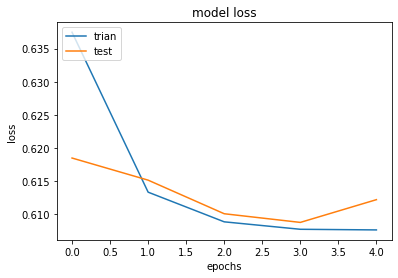

In [17]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(["trian", "test"], loc="upper left")
plt.show()

In [25]:
movie_df = pd.read_csv(movielens_dir / "movies.csv")

user_id = df.userId.sample(1).iloc[0]
movies_watched_by_user = df[df.userId == user_id]
movies_not_watched = movie_df[~movie_df["movieId"].isin(movies_watched_by_user.movieId.values)]["movieId"]
movies_not_watched = list(set(movies_not_watched).intersection(set(movie2movie_encoded.keys())))

movies_not_watched = [[movie2movie_encoded.get(x)] for x in movies_not_watched]
user_encoder = user2user_encoded.get(user_id)
user_movie_array = np.hstack(([[user_encoder]] * len(movies_not_watched), movies_not_watched))
ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [movie_encoded2movie.get(movies_not_watched[x][0]) for x in top_ratings_indices]

print("Showing recommendations for user: {}".format(user_id))
print("===="*9)
print("Movies with high ratings from user")
print("----"*8)
top_movies_user = (movies_watched_by_user.sort_values(by="rating", ascending=False).head(5).movieId.values)
movie_df_rows = movie_df[movie_df["movieId"].isin(top_movies_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ":", row.genres)
    
print("----" * 8)
print("Top 10 movie recommedations")
print("----" * 8)
recommended_movies = movie_df[movie_df["movieId"].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.title, ":", row.genres)

Showing recommendations for user: 474
Movies with high ratings from user
--------------------------------
Dead Man Walking (1995) : Crime|Drama
Shadowlands (1993) : Drama|Romance
L.A. Confidential (1997) : Crime|Film-Noir|Mystery|Thriller
King and I, The (1956) : Drama|Musical|Romance
Harry Potter and the Prisoner of Azkaban (2004) : Adventure|Fantasy|IMAX
--------------------------------
Top 10 movie recommedations
--------------------------------
Lock, Stock & Two Smoking Barrels (1998) : Comedy|Crime|Thriller
Go (1999) : Comedy|Crime
South Park: Bigger, Longer and Uncut (1999) : Animation|Comedy|Musical
Boondock Saints, The (2000) : Action|Crime|Drama|Thriller
Snatch (2000) : Comedy|Crime|Thriller
Amores Perros (Love's a Bitch) (2000) : Drama|Thriller
Kiss Kiss Bang Bang (2005) : Comedy|Crime|Mystery|Thriller
Dark Knight, The (2008) : Action|Crime|Drama|IMAX
WALL·E (2008) : Adventure|Animation|Children|Romance|Sci-Fi
Toy Story 3 (2010) : Adventure|Animation|Children|Comedy|Fantasy|I

# Project 54

In [29]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import math

In [79]:
CSV_HEADER = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "gender",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "income_bracket",
]

train_data_url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
)
train_data = pd.read_csv(train_data_url, header=None, names=CSV_HEADER)

test_data_url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
)
test_data = pd.read_csv(test_data_url, header=None, names=CSV_HEADER)

print(f"Train dataset shape: {train_data.shape}")
print(f"Test dataset shape: {test_data.shape}")

Train dataset shape: (32561, 15)
Test dataset shape: (16282, 15)


In [80]:
test_data = test_data[1:]
test_data.income_bracket = test_data.income_bracket.apply(lambda value: value.replace(".", ""))

In [81]:
train_data_file = "train_data.csv"
test_data_file = "test_data.csv"

train_data.to_csv(train_data_file, index = False, header=False)
test_data.to_csv(test_data_file, index=False, header=False)

In [91]:
NUMERIC_FEATURE_NAMES = [
    "age",
    "education_num",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
]
# A dictionary of the categorical features and their vocabulary.
CATEGORICAL_FEATURES_WITH_VOCABULARY = {
    "workclass": sorted(list(train_data["workclass"].unique())),
    "education": sorted(list(train_data["education"].unique())),
    "marital_status": sorted(list(train_data["marital_status"].unique())),
    "occupation": sorted(list(train_data["occupation"].unique())),
    "relationship": sorted(list(train_data["relationship"].unique())),
    "race": sorted(list(train_data["race"].unique())),
    "gender": sorted(list(train_data["gender"].unique())),
    "native_country": sorted(list(train_data["native_country"].unique())),
}
# A list of the columns to ignore from the dataset.
IGNORE_COLUMN_NAMES = ["fnlwgt"]
# A list of the categorical feature names.
CATEGORICAL_FEATURE_NAMES = list(CATEGORICAL_FEATURES_WITH_VOCABULARY.keys())
# A list of all the input features.
FEATURE_NAMES = NUMERIC_FEATURE_NAMES + CATEGORICAL_FEATURE_NAMES
# A list of column default values for each feature.
COLUMN_DEFAULTS = [
    [0.0] if feature_name in NUMERIC_FEATURE_NAMES + IGNORE_COLUMN_NAMES else ["NA"]
    for feature_name in CSV_HEADER
]
# The name of the target feature.
TARGET_FEATURE_NAME = "income_bracket"
# A list of the labels of the target features.
TARGET_LABELS = [" <=50K", " >50K"]

In [100]:
from tensorflow.keras.layers import StringLookup

target_label_lookup = StringLookup(
    vocabulary=TARGET_LABELS, mask_token=None, num_oov_indices=0
)


def get_dataset_from_csv(csv_file_path, shuffle=False, batch_size=128):
    dataset = tf.data.experimental.make_csv_dataset(
        csv_file_path,
        batch_size=batch_size,
        column_names=CSV_HEADER,
        column_defaults=COLUMN_DEFAULTS,
        label_name=TARGET_FEATURE_NAME,
        num_epochs=1,
        header=False,
        na_value="?",
        shuffle=shuffle,
    ).map(lambda features, target: (features, target_label_lookup(target)))
    return dataset.cache()


In [101]:
def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        if feature_name in NUMERIC_FEATURE_NAMES:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.float32
            )
        else:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.string
            )
    return inputs


In [102]:
def encode_inputs(inputs):
    encoded_features = []
    for feature_name in inputs:
        if feature_name in CATEGORICAL_FEATURE_NAMES:
            vocabulary = CATEGORICAL_FEATURES_WITH_VOCABULARY[feature_name]
            # Create a lookup to convert a string values to an integer indices.
            # Since we are not using a mask token, nor expecting any out of vocabulary
            # (oov) token, we set mask_token to None and num_oov_indices to 0.
            lookup = StringLookup(
                vocabulary=vocabulary, mask_token=None, num_oov_indices=0
            )
            # Convert the string input values into integer indices.
            value_index = lookup(inputs[feature_name])
            embedding_dims = int(math.sqrt(lookup.vocabulary_size()))
            # Create an embedding layer with the specified dimensions.
            embedding = layers.Embedding(
                input_dim=lookup.vocabulary_size(), output_dim=embedding_dims
            )
            # Convert the index values to embedding representations.
            encoded_feature = embedding(value_index)
        else:
            # Use the numerical features as-is.
            encoded_feature = inputs[feature_name]
            if inputs[feature_name].shape[-1] is None:
                encoded_feature = tf.expand_dims(encoded_feature, -1)

        encoded_features.append(encoded_feature)

    encoded_features = layers.concatenate(encoded_features)
    return encoded_features


In [103]:
class NeuralDecisionTree(keras.Model):
    def __init__(self, depth, num_features, used_features_rate, num_classes):
        super(NeuralDecisionTree, self).__init__()
        self.depth = depth
        self.num_leaves = 2 ** depth
        self.num_classes = num_classes

        # Create a mask for the randomly selected features.
        num_used_features = int(num_features * used_features_rate)
        one_hot = np.eye(num_features)
        sampled_feature_indicies = np.random.choice(
            np.arange(num_features), num_used_features, replace=False
        )
        self.used_features_mask = one_hot[sampled_feature_indicies]

        # Initialize the weights of the classes in leaves.
        self.pi = tf.Variable(
            initial_value=tf.random_normal_initializer()(
                shape=[self.num_leaves, self.num_classes]
            ),
            dtype="float32",
            trainable=True,
        )

        # Initialize the stochastic routing layer.
        self.decision_fn = layers.Dense(
            units=self.num_leaves, activation="sigmoid", name="decision"
        )

    def call(self, features):
        batch_size = tf.shape(features)[0]

        # Apply the feature mask to the input features.
        features = tf.matmul(
            features, self.used_features_mask, transpose_b=True
        )  # [batch_size, num_used_features]
        # Compute the routing probabilities.
        decisions = tf.expand_dims(
            self.decision_fn(features), axis=2
        )  # [batch_size, num_leaves, 1]
        # Concatenate the routing probabilities with their complements.
        decisions = layers.concatenate(
            [decisions, 1 - decisions], axis=2
        )  # [batch_size, num_leaves, 2]

        mu = tf.ones([batch_size, 1, 1])

        begin_idx = 1
        end_idx = 2
        # Traverse the tree in breadth-first order.
        for level in range(self.depth):
            mu = tf.reshape(mu, [batch_size, -1, 1])  # [batch_size, 2 ** level, 1]
            mu = tf.tile(mu, (1, 1, 2))  # [batch_size, 2 ** level, 2]
            level_decisions = decisions[
                :, begin_idx:end_idx, :
            ]  # [batch_size, 2 ** level, 2]
            mu = mu * level_decisions  # [batch_size, 2**level, 2]
            begin_idx = end_idx
            end_idx = begin_idx + 2 ** (level + 1)

        mu = tf.reshape(mu, [batch_size, self.num_leaves])  # [batch_size, num_leaves]
        probabilities = keras.activations.softmax(self.pi)  # [num_leaves, num_classes]
        outputs = tf.matmul(mu, probabilities)  # [batch_size, num_classes]
        return outputs


In [104]:
class NeuralDecisionForest(keras.Model):
    def __init__(self, num_trees, depth, num_features, used_features_rate, num_classes):
        super(NeuralDecisionForest, self).__init__()
        self.ensemble = []
        for _ in range(num_trees):
            self.ensemble.append(NeuralDecisionTree(depth, num_features, used_features_rate, num_classes))
    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        outputs = tf.zeros([batch_size, num_classes])
        
        for tree in self.ensemble:
            outputs += tree(inputs)
        outputs /= len(self.ensemble)
        return outputs

In [105]:
learning_rate = 0.01
batch_size = 265
num_epochs = 10
hidden_units = [64, 64]

def run_experiment(model):
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
                  loss=keras.losses.SparseCategoricalCrossentropy(), 
                 metrics = [keras.metrics.SparseCategoricalAccuracy()])
    print("start training the model...")
    train_dataset = get_dataset_from_csv(train_data_file, shuffle=True, batch_size=batch_size)
    model.fit(train_dataset, epochs=num_epochs)
    print("Model training finished")
    
    print("Evaluating the model on the test data...")
    test_dataset = get_dataset_from_csv(test_data_file, batch_size=batch_size)
    
    _, accuracy = model.evaluate(test_dataset)
    print(f"Test accuracy: {round(accuracy *100, 2)}%")

In [106]:
num_trees = 10
depth = 10
used_features_rate = 1.0
num_classes = len(TARGET_LABELS)

def create_tree_model():
    inputs = create_model_inputs()
    features = encode_inputs(inputs)
    features = layers.BatchNormalization()(features)
    num_features = features.shape[1]
    
    tree = NeuralDecisionTree(depth, num_features, used_features_rate, num_classes)
    
    outputs = tree(features)
    model = keras.Model(inputs = inputs, outputs = outputs)
    return model

In [107]:
tree_model = create_tree_model()
run_experiment(tree_model)

start training the model...
Epoch 1/10


C:\Users\jatin\anaconda3\lib\site-packages\keras\engine\functional.py:559: UserWarning: Input dict contained keys ['fnlwgt'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


123/123 [==============================] - 10s 42ms/step - loss: 0.4416 - sparse_categorical_accuracy: 0.8308
Epoch 2/10
123/123 [==============================] - 5s 39ms/step - loss: 0.3325 - sparse_categorical_accuracy: 0.8531
Epoch 3/10
123/123 [==============================] - 5s 39ms/step - loss: 0.3211 - sparse_categorical_accuracy: 0.8547
Epoch 4/10
123/123 [==============================] - 5s 39ms/step - loss: 0.3155 - sparse_categorical_accuracy: 0.8565
Epoch 5/10
123/123 [==============================] - 5s 39ms/step - loss: 0.3108 - sparse_categorical_accuracy: 0.8588
Epoch 6/10
123/123 [==============================] - 5s 39ms/step - loss: 0.3063 - sparse_categorical_accuracy: 0.8622
Epoch 7/10
123/123 [==============================] - 5s 39ms/step - loss: 0.3021 - sparse_categorical_accuracy: 0.8637
Epoch 8/10
123/123 [==============================] - 5s 38ms/step - loss: 0.2975 - sparse_categorical_accuracy: 0.8667
Epoch 9/10
123/123 [==============================

In [109]:
num_trees = 25
depth = 5
used_features_rate = 0.5

def create_forest_model():
    inputs = create_model_inputs()
    features = encode_inputs(inputs)
    features = layers.BatchNormalization()(features)
    num_features = features.shape[1]
    
    forest_model = NeuralDecisionForest(num_trees, depth, num_features, used_features_rate, num_classes)
    
    outputs = forest_model(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

forest_model = create_forest_model()
run_experiment(forest_model)

start training the model...
Epoch 1/10
123/123 [==============================] - 26s 21ms/step - loss: 0.4582 - sparse_categorical_accuracy: 0.8162
Epoch 2/10
123/123 [==============================] - 2s 20ms/step - loss: 0.3389 - sparse_categorical_accuracy: 0.8462
Epoch 3/10
123/123 [==============================] - 2s 19ms/step - loss: 0.3256 - sparse_categorical_accuracy: 0.8485
Epoch 4/10
123/123 [==============================] - 2s 19ms/step - loss: 0.3199 - sparse_categorical_accuracy: 0.8507
Epoch 5/10
123/123 [==============================] - 2s 19ms/step - loss: 0.3163 - sparse_categorical_accuracy: 0.8525
Epoch 6/10
123/123 [==============================] - 2s 19ms/step - loss: 0.3137 - sparse_categorical_accuracy: 0.8537
Epoch 7/10
123/123 [==============================] - 2s 19ms/step - loss: 0.3116 - sparse_categorical_accuracy: 0.8543
Epoch 8/10
123/123 [==============================] - 2s 19ms/step - loss: 0.3097 - sparse_categorical_accuracy: 0.8553
Epoch 9/10


# Project 55

In [1]:
import os
import math
from zipfile import ZipFile
from urllib.request import urlretrieve
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import StringLookup

In [2]:
urlretrieve("http://files.grouplens.org/datasets/movielens/ml-1m.zip", "movielens.zip")
ZipFile("movielens.zip", "r").extractall()

In [3]:
users = pd.read_csv("ml-1m/users.dat", sep="::", names=["user_id", "sex", "age_group", "occupation", "zip_code"])
ratings = pd.read_csv("ml-1m/ratings.dat", sep="::", names=["user_id", "movie_id", "rating", "unix_timestamp"])
movies = pd.read_csv("ml-1m/movies.dat", sep="::", names=["movie_id", "title", "genres"])

<ipython-input-3-73703e2bc028>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv("ml-1m/users.dat", sep="::", names=["user_id", "sex", "age_group", "occupation", "zip_code"])
<ipython-input-3-73703e2bc028>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv("ml-1m/ratings.dat", sep="::", names=["user_id", "movie_id", "rating", "unix_timestamp"])
<ipython-input-3-73703e2bc028>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can a

In [4]:
users["user_id"] = users["user_id"].apply(lambda x: f"user_{x}")
users["age_group"] = users["age_group"].apply(lambda x: f"group_{x}")
users["occupation"] = users["occupation"].apply(lambda x: f"occupation_{x}")

movies["movie_id"] = movies["movie_id"].apply(lambda x: f"movie_{x}")

ratings["movie_id"] = ratings["movie_id"].apply(lambda x: f"movie_{x}")
ratings["user_id"] = ratings["user_id"].apply(lambda x: f"user_{x}")
ratings["rating"] = ratings["rating"].apply(lambda x: float(x))


In [5]:
genres = [
    "Action",
    "Adventure",
    "Animation",
    "Children's",
    "Comedy",
    "Crime",
    "Documentary",
    "Drama",
    "Fantasy",
    "Film-Noir",
    "Horror",
    "Musical",
    "Mystery",
    "Romance",
    "Sci-Fi",
    "Thriller",
    "War",
    "Western",
]

for genre in genres:
    movies[genre] = movies["genres"].apply(
        lambda values: int(genre in values.split("|"))
    )


In [6]:
ratings_group = ratings.sort_values(by=["unix_timestamp"]).groupby("user_id")
ratings_data = pd.DataFrame(data={
    "user_id": list(ratings_group.groups.keys()),
    "movie_ids":list(ratings_group.movie_id.apply(list)),
    "ratings": list(ratings_group.rating.apply(list)),
    "timestamps": list(ratings_group.unix_timestamp.apply(list))
})

In [7]:
sequence_length = 4
step_size = 2

def create_sequences(values, window_size, step_size):
    sequences = []
    start_index = 0
    while True:
        end_index = start_index + window_size
        seq = values[start_index:end_index]
        if len(seq) < window_size:
            seq = values[-window_size:]
            if len(seq) == window_size:
                sequences.append(seq)
            break
        sequences.append(seq)
        start_index += step_size
    return sequences

ratings_data.movie_ids = ratings_data.movie_ids.apply(lambda ids: create_sequences(ids, 
                        sequence_length, step_size))
ratings_data.ratings = ratings_data.ratings.apply(lambda ids: create_sequences(ids, sequence_length, step_size))
del ratings_data["timestamps"]

In [8]:
ratings_data_movies = ratings_data[["user_id", "movie_ids"]].explode("movie_ids", ignore_index=True)
ratings_data_rating = ratings_data[["ratings"]].explode("ratings", ignore_index=True)
ratings_data_transformed = pd.concat([ratings_data_movies, ratings_data_rating], axis=1)
ratings_data_transformed = ratings_data_transformed.join(users.set_index("user_id"), on="user_id")
ratings_data_transformed.movie_ids = ratings_data_transformed.movie_ids.apply(lambda x: ",".join(x))
ratings_data_transformed.ratings = ratings_data_transformed.ratings.apply(lambda x: ",".join([str(v) for v in x]))
del ratings_data_transformed["zip_code"]
ratings_data_transformed.rename(columns={"movie_ids":"sequence_movie_ids", "ratings":"sequence_ratings"}, 
                                inplace=True)

In [9]:
random_selection = np.random.rand(len(ratings_data_transformed.index)) <= 0.85
train_data = ratings_data_transformed[random_selection]
test_data = ratings_data_transformed[~random_selection]

train_data.to_csv("train_data.csv", index=False, sep="|", header=False)
test_data.to_csv("test_data.csv", index=False, sep="|", header=False)

In [10]:
CSV_HEADER = list(ratings_data_transformed.columns)
CATEGORICAL_FEATURES_WITH_VOCABULARY = {
    "user_id":list(users.user_id.unique()),
    "movie_id":list(movies.movie_id.unique()),
    "sex":list(users.sex.unique()),
    "age_group":list(users.age_group.unique()),
    "accupation":list(users.occupation.unique()),
}
USER_FEATURES = ["sex","age_group", "occupation"]
MOVIE_FEATURES = ["genres"]

In [11]:
def get_dataset_from_csv(csv_file_path, shuffle=False, batch_size=128):
    def process(features):
        movie_ids_string = features["sequence_movie_ids"]
        sequence_movie_ids = tf.strings.split(movie_ids_string, ",").to_tensor()
        
        features["target_movie_id"] = sequence_movie_ids[:, -1]
        features["sequence_movie_ids"] = sequence_movie_ids[:, :-1]
        
        ratings_string = features["sequence_ratings"]
        sequence_ratings = tf.strings.to_number(tf.strings.split(ratings_string, ","), 
                                                tf.dtypes.float32).to_tensor()
        
        target = sequence_ratings[:, -1]
        features["sequence_ratings"] = sequence_ratings[:, :-1]
        return features, target
    dataset = tf.data.experimental.make_csv_dataset(csv_file_path, batch_size=batch_size, column_names=CSV_HEADER, 
                                                   num_epochs=1, field_delim="|", shuffle=shuffle).map(process)
    return dataset


In [12]:
def create_model_inputs():
    return {
        "user_id":layers.Input(name="user_id", shape=(1, ), dtype=tf.string),
        "sequence_movie_ids":layers.Input(name="sequence_movie_ids", shape=(sequence_length - 1,), dtype=tf.string),
        "target_movie_id":layers.Input(name="target_movie_id", shape=(1, ), dtype=tf.string),
        "sequence_ratings":layers.Input(name="sequence_ratings", shape=(sequence_length - 1,),dtype=tf.float32),
        "sex":layers.Input(name="sex", shape=(1,), dtype=tf.string),
        "age_group":layers.Input(name="age_group", shape=(1,), dtype=tf.string),
        "occupation":layers.Input(name="occupation", shape=(1,), dtype=tf.string)
    }

In [21]:
def encode_input_features(
    inputs,
    include_user_id=True,
    include_user_features=True,
    include_movie_features=True,
):

    encoded_transformer_features = []
    encoded_other_features = []

    other_feature_names = []
    if include_user_id:
        other_feature_names.append("user_id")
    if include_user_features:
        other_feature_names.extend(USER_FEATURES)

    ## Encode user features
    for feature_name in other_feature_names:
        # Convert the string input values into integer indices.
        vocabulary = CATEGORICAL_FEATURES_WITH_VOCABULARY[feature_name]
        idx = StringLookup(vocabulary=vocabulary, mask_token=None, num_oov_indices=0)(
            inputs[feature_name]
        )
        # Compute embedding dimensions
        embedding_dims = int(math.sqrt(len(vocabulary)))
        # Create an embedding layer with the specified dimensions.
        embedding_encoder = layers.Embedding(
            input_dim=len(vocabulary),
            output_dim=embedding_dims,
            name=f"{feature_name}_embedding",
        )
        # Convert the index values to embedding representations.
        encoded_other_features.append(embedding_encoder(idx))

    ## Create a single embedding vector for the user features
    if len(encoded_other_features) > 1:
        encoded_other_features = layers.concatenate(encoded_other_features)
    elif len(encoded_other_features) == 1:
        encoded_other_features = encoded_other_features[0]
    else:
        encoded_other_features = None

    ## Create a movie embedding encoder
    movie_vocabulary = CATEGORICAL_FEATURES_WITH_VOCABULARY["movie_id"]
    movie_embedding_dims = int(math.sqrt(len(movie_vocabulary)))
    # Create a lookup to convert string values to integer indices.
    movie_index_lookup = StringLookup(
        vocabulary=movie_vocabulary,
        mask_token=None,
        num_oov_indices=0,
        name="movie_index_lookup",
    )
    # Create an embedding layer with the specified dimensions.
    movie_embedding_encoder = layers.Embedding(
        input_dim=len(movie_vocabulary),
        output_dim=movie_embedding_dims,
        name=f"movie_embedding",
    )
    # Create a vector lookup for movie genres.
    genre_vectors = movies[genres].to_numpy()
    movie_genres_lookup = layers.Embedding(
        input_dim=genre_vectors.shape[0],
        output_dim=genre_vectors.shape[1],
        embeddings_initializer=tf.keras.initializers.Constant(genre_vectors),
        trainable=False,
        name="genres_vector",
    )
    # Create a processing layer for genres.
    movie_embedding_processor = layers.Dense(
        units=movie_embedding_dims,
        activation="relu",
        name="process_movie_embedding_with_genres",
    )

    ## Define a function to encode a given movie id.
    def encode_movie(movie_id):
        # Convert the string input values into integer indices.
        movie_idx = movie_index_lookup(movie_id)
        movie_embedding = movie_embedding_encoder(movie_idx)
        encoded_movie = movie_embedding
        if include_movie_features:
            movie_genres_vector = movie_genres_lookup(movie_idx)
            encoded_movie = movie_embedding_processor(
                layers.concatenate([movie_embedding, movie_genres_vector])
            )
        return encoded_movie

    ## Encoding target_movie_id
    target_movie_id = inputs["target_movie_id"]
    encoded_target_movie = encode_movie(target_movie_id)

    ## Encoding sequence movie_ids.
    sequence_movies_ids = inputs["sequence_movie_ids"]
    encoded_sequence_movies = encode_movie(sequence_movies_ids)
    # Create positional embedding.
    position_embedding_encoder = layers.Embedding(
        input_dim=sequence_length,
        output_dim=movie_embedding_dims,
        name="position_embedding",
    )
    positions = tf.range(start=0, limit=sequence_length - 1, delta=1)
    encodded_positions = position_embedding_encoder(positions)
    # Retrieve sequence ratings to incorporate them into the encoding of the movie.
    sequence_ratings = tf.expand_dims(inputs["sequence_ratings"], -1)
    # Add the positional encoding to the movie encodings and multiply them by rating.
    encoded_sequence_movies_with_poistion_and_rating = layers.Multiply()(
        [(encoded_sequence_movies + encodded_positions), sequence_ratings]
    )

    # Construct the transformer inputs.
    for encoded_movie in tf.unstack(
        encoded_sequence_movies_with_poistion_and_rating, axis=1
    ):
        encoded_transformer_features.append(tf.expand_dims(encoded_movie, 1))
    encoded_transformer_features.append(encoded_target_movie)

    encoded_transformer_features = layers.concatenate(
        encoded_transformer_features, axis=1
    )

    return encoded_transformer_features, encoded_other_features


In [23]:
include_user_id = False
include_user_features = False
include_movie_features = False

hidden_units = [256, 128]
dropout_rate = 0.1
num_heads = 3


def create_model():
    inputs = create_model_inputs()
    transformer_features, other_features = encode_input_features(
        inputs, include_user_id, include_user_features, include_movie_features
    )

    # Create a multi-headed attention layer.
    attention_output = layers.MultiHeadAttention(
        num_heads=num_heads, key_dim=transformer_features.shape[2], dropout=dropout_rate
    )(transformer_features, transformer_features)

    # Transformer block.
    attention_output = layers.Dropout(dropout_rate)(attention_output)
    x1 = layers.Add()([transformer_features, attention_output])
    x1 = layers.LayerNormalization()(x1)
    x2 = layers.LeakyReLU()(x1)
    x2 = layers.Dense(units=x2.shape[-1])(x2)
    x2 = layers.Dropout(dropout_rate)(x2)
    transformer_features = layers.Add()([x1, x2])
    transformer_features = layers.LayerNormalization()(transformer_features)
    features = layers.Flatten()(transformer_features)

    # Included the other features.
    if other_features is not None:
        features = layers.concatenate(
            [features, layers.Reshape([other_features.shape[-1]])(other_features)]
        )

    # Fully-connected layers.
    for num_units in hidden_units:
        features = layers.Dense(num_units)(features)
        features = layers.BatchNormalization()(features)
        features = layers.LeakyReLU()(features)
        features = layers.Dropout(dropout_rate)(features)

    outputs = layers.Dense(units=1)(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


model = create_model()


In [25]:
model.compile(optimizer=keras.optimizers.Adagrad(learning_rate=0.01), loss=keras.losses.MeanSquaredError(), 
             metrics=[keras.metrics.MeanAbsoluteError()])
train_dataset = get_dataset_from_csv("train_data.csv", shuffle=True, batch_size=265)
model.fit(train_dataset, epochs=5)
test_dataset = get_dataset_from_csv("test_data.csv", batch_size=265)
_, rmse = model.evaluate(test_dataset, verbose=0)
print(f"Test MAE: {round(rmse, 3)}")

Epoch 1/5
1598/1598 [==============================] - 71s 42ms/step - loss: 0.8999 - mean_absolute_error: 0.7549
Epoch 2/5
1598/1598 [==============================] - 68s 43ms/step - loss: 0.8766 - mean_absolute_error: 0.7448
Epoch 3/5
1598/1598 [==============================] - 68s 42ms/step - loss: 0.8630 - mean_absolute_error: 0.7387
Epoch 4/5
1598/1598 [==============================] - 67s 42ms/step - loss: 0.8533 - mean_absolute_error: 0.7343
Epoch 5/5
1598/1598 [==============================] - 68s 42ms/step - loss: 0.8448 - mean_absolute_error: 0.7306
Test MAE: 0.766


# Project 56

In [1]:
import math 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

C:\Users\jatin\anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [2]:
CSV_HEADER = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "gender",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "income_bracket",
]

train_data_url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
)
train_data = pd.read_csv(train_data_url, header=None, names=CSV_HEADER)

test_data_url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"
)
test_data = pd.read_csv(test_data_url, header=None, names=CSV_HEADER)

print(f"Train dataset shape: {train_data.shape}")
print(f"Test dataset shape: {test_data.shape}")

Train dataset shape: (32561, 15)
Test dataset shape: (16282, 15)


In [3]:
test_data = test_data[1:]
test_data.income_bracket = test_data.income_bracket.apply(lambda value: value.replace(".", ""))

In [4]:
train_data_file = "train_data.csv"
test_data_file = "test_data.csv"

train_data.to_csv(train_data_file, index=False, header=False)
test_data.to_csv(test_data_file, index=False, header=False)

In [43]:
NUMERIC_FEATURE_NAMES = [
    "age",
    "education_num",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
]
# A dictionary of the categorical features and their vocabulary.
CATEGORICAL_FEATURES_WITH_VOCABULARY = {
    "workclass": sorted(list(train_data["workclass"].unique())),
    "education": sorted(list(train_data["education"].unique())),
    "marital_status": sorted(list(train_data["marital_status"].unique())),
    "occupation": sorted(list(train_data["occupation"].unique())),
    "relationship": sorted(list(train_data["relationship"].unique())),
    "race": sorted(list(train_data["race"].unique())),
    "gender": sorted(list(train_data["gender"].unique())),
    "native_country": sorted(list(train_data["native_country"].unique())),
}
# A list of the columns to ignore from the dataset.
WEIGHT_COLUMN_NAMES = "fnlwgt"
# A list of the categorical feature names.
CATEGORICAL_FEATURE_NAMES = list(CATEGORICAL_FEATURES_WITH_VOCABULARY.keys())
# A list of all the input features.
FEATURE_NAMES = NUMERIC_FEATURE_NAMES + CATEGORICAL_FEATURE_NAMES
# A list of column default values for each feature.
COLUMN_DEFAULTS = [
    [0.0] if feature_name in NUMERIC_FEATURE_NAMES + [WEIGHT_COLUMN_NAMES] else ["NA"]
    for feature_name in CSV_HEADER
]
# The name of the target feature.
TARGET_FEATURE_NAME = "income_bracket"
# A list of the labels of the target features.
TARGET_LABELS = [" <=50K", " >50K"]

In [44]:
LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.0001
DROPOUT_RATE = 0.2
BATCH_SIZE = 265
NUM_EPOCHS = 15

NUM_TRANSFORMER_BLOCKS = 3
NUM_HEADS = 4
EMBEDDING_DIMS = 16
MLP_HIDDEN_UNITS_FACTORS = [
    2,
    1,
]
NUM_MLP_BLOCKS = 2

In [45]:
target_label_lookup = layers.StringLookup(vocabulary=TARGET_LABELS, mask_token=None, num_oov_indices=0)

def prepare_example(features, target):
    target_index = target_label_lookup(target)
    weights = features.pop(WEIGHT_COLUMN_NAMES)
    return features, target_index, weights

def get_dataset_from_csv(csv_file_path, batch_size=128, shuffle=False):
    dataset = tf.data.experimental.make_csv_dataset(csv_file_path, batch_size=batch_size, column_names=CSV_HEADER,
                                                   column_defaults=COLUMN_DEFAULTS, label_name=TARGET_FEATURE_NAME,
                                                   num_epochs=1, header=False, na_value="?", shuffle=shuffle).map(
    prepare_example, num_parallel_calls=tf.data.AUTOTUNE, deterministic=False)
    return dataset.cache()

In [46]:
def run_experiment(model, train_data_file, test_data_file, num_epochs, learning_rate, weight_decay, batch_size):
    optimizer = tfa.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay)
    model.compile(optimizer=optimizer, loss=keras.losses.BinaryCrossentropy(), metrics=[
        keras.metrics.BinaryAccuracy(name="accuracy")
    ])
    train_dataset = get_dataset_from_csv(train_data_file, batch_size, shuffle=True)
    validation_dataset = get_dataset_from_csv(test_data_file, batch_size)
    
    print("Start training the model...")
    history = model.fit(train_dataset, epochs=num_epochs, validation_data=validation_dataset)
    print("Model training finished")
    
    _, accuracy = model.evaluate(validation_dataset, verbose=0)
    print(f"Validation accuracy: {round(accuracy * 100, 2)}%")
    return history

In [47]:
def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        if feature_name in NUMERIC_FEATURE_NAMES:
            inputs[feature_name] = layers.Input(name=feature_name, shape=(), dtype=tf.float32)
        else:
            inputs[feature_name] = layers.Input(name=feature_name, shape=(), dtype=tf.string)
    return inputs

In [48]:
def encode_inputs(inputs, embedding_dims):
    encoded_categorical_feature_list = []
    numerical_feature_list = []
    for feature_name in inputs:
        if feature_name in CATEGORICAL_FEATURE_NAMES:
            vocabulary = CATEGORICAL_FEATURES_WITH_VOCABULARY[feature_name]
            lookup = layers.StringLookup(vocabulary=vocabulary, mask_token=None, num_oov_indices=0, 
                                         output_mode="int")
            encoded_feature = lookup(inputs[feature_name])
            embedding = layers.Embedding(input_dim=len(vocabulary), output_dim=embedding_dims)
            
            encoded_categorical_feature = embedding(encoded_feature)
            encoded_categorical_feature_list.append(encoded_categorical_feature)
        else:
            numerical_feature = tf.expand_dims(inputs[feature_name], -1)
            numerical_feature_list.append(numerical_feature)
    return encoded_categorical_feature_list, numerical_feature_list

In [49]:
def create_mlp(hidden_units, dropout_rate, activation, normalization_layer, name=None):
    mlp_layers = []
    for units in hidden_units:
        mlp_layers.append(normalization_layer)
        mlp_layers.append(layers.Dense(units, activation))
        mlp_layers.append(layers.Dropout(dropout_rate))
    return keras.Sequential(mlp_layers, name=name)

In [50]:
def create_baseline_model(embedding_dims, num_mlp_blocks, mlp_hidden_units_factors, dropout_rate):
    inputs = create_model_inputs()
    encoded_categorical_feature_list, numerical_feature_list = encode_inputs(inputs, embedding_dims)
    
    features = layers.concatenate(encoded_categorical_feature_list + numerical_feature_list)
    
    feedforward_units = [features.shape[-1]]
    
    for layer_idx in range(num_mlp_blocks):
        features = create_mlp(hidden_units=feedforward_units, dropout_rate=dropout_rate, 
                              activation=keras.activations.gelu, 
                              normalization_layer=layers.LayerNormalization(epsilon=1e-6), 
                              name=f"feedforward_{layer_idx}")(features)
    mlp_hidden_units = [factor * features.shape[-1] for factor in mlp_hidden_units_factors]
    features = create_mlp(hidden_units=mlp_hidden_units, dropout_rate=dropout_rate, 
                          activation=keras.activations.selu, 
                         normalization_layer = layers.BatchNormalization(), name="MLP")(features)
    outputs = layers.Dense(units=1, activation="sigmoid", name="sigmoid")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

baseline_model = create_baseline_model(embedding_dims=EMBEDDING_DIMS, num_mlp_blocks=NUM_MLP_BLOCKS, 
                                      mlp_hidden_units_factors=MLP_HIDDEN_UNITS_FACTORS, dropout_rate=DROPOUT_RATE)
print("Total model weights:", baseline_model.count_params())

Total model weights: 109629


In [51]:
history = run_experiment(model=baseline_model, train_data_file=train_data_file, test_data_file=test_data_file, 
                        num_epochs=NUM_EPOCHS, learning_rate=LEARNING_RATE, weight_decay=WEIGHT_DECAY, 
                         batch_size=BATCH_SIZE)

Start training the model...
Epoch 1/15
123/123 [==============================] - 9s 30ms/step - loss: 110123.4688 - accuracy: 0.7475 - val_loss: 95868.6172 - val_accuracy: 0.7825
Epoch 2/15
123/123 [==============================] - 3s 22ms/step - loss: 92941.3047 - accuracy: 0.7673 - val_loss: 75568.3281 - val_accuracy: 0.7659
Epoch 3/15
123/123 [==============================] - 3s 24ms/step - loss: 76689.8906 - accuracy: 0.7925 - val_loss: 68912.7969 - val_accuracy: 0.8093
Epoch 4/15
123/123 [==============================] - 3s 23ms/step - loss: 72401.1172 - accuracy: 0.8025 - val_loss: 69432.6016 - val_accuracy: 0.8003
Epoch 5/15
123/123 [==============================] - 3s 22ms/step - loss: 70678.8906 - accuracy: 0.8061 - val_loss: 69535.9453 - val_accuracy: 0.8000
Epoch 6/15
123/123 [==============================] - 3s 23ms/step - loss: 69226.3047 - accuracy: 0.8105 - val_loss: 70996.0938 - val_accuracy: 0.7931
Epoch 7/15
123/123 [==============================] - 3s 22ms/ste

In [55]:
def create_tabtransformer_classifier(num_transformer_blocks, num_heads, embedding_dims, mlp_hidden_units_factors,
                                    dropout_rate, use_column_embedding=False):
    inputs = create_model_inputs()
    encoded_categorical_feature_list, numerical_feature_list = encode_inputs(inputs, embedding_dims)
    encoded_categorical_features = tf.stack(encoded_categorical_feature_list, axis=1)
    numerical_features = layers.concatenate(numerical_feature_list)
    if use_column_embedding:
        num_columns = encoded_categorical_features.shape[1]
        column_embedding = layers.Embedding(inputs_dim=num_columns, output_dim=embedding_dims)
        column_indices = tf.range(start=0, limit=num_columns, delta=1)
        encoded_categoical_features = encoded_categorical_features + column_embedding(column_indices)
    for block_idx in range(num_transformer_blocks):
        attention_output = layers.MultiHeadAttention(num_heads = num_heads, key_dim=embedding_dims, 
                dropout=dropout_rate, name=f"multihead_attention_{block_idx}")(encoded_categorical_features, 
                                                                               encoded_categorical_features)
        x = layers.Add(name=f"skip_connection1_{block_idx}")([attention_output, encoded_categorical_features])
        x = layers.LayerNormalization(name=f"layer_norm1_{block_idx}", epsilon=1e-6)(x)
        feedforward_output = create_mlp(hidden_units=[embedding_dims], dropout_rate=dropout_rate, 
                                        activation=keras.activations.gelu, normalization_layer=
                                    layers.LayerNormalization(epsilon=1e-6), name=f"feedforward_{block_idx}")(x)
        x = layers.Add(name=f"skip_connection2_{block_idx}")([feedforward_output, x])
        encoded_categorical_features = layers.LayerNormalization(name=f"layer_norm2_{block_idx}", epsilon=1e-6)(x)
    categorical_features = layers.Flatten()(encoded_categorical_features)
    numerical_features = layers.LayerNormalization(epsilon=1e-6)(numerical_features)
    features = layers.concatenate([categorical_features, numerical_features])
    mlp_hidden_units = [factor*features.shape[-1] for factor in mlp_hidden_units_factors]
    features = create_mlp(hidden_units=mlp_hidden_units, dropout_rate=dropout_rate, activation=
                          keras.activations.selu, normalization_layer=layers.BatchNormalization(), 
                          name="MLP")(features)
    outputs = layers.Dense(units=1, activation="sigmoid", name="sigmoid")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

tabtransformer_model = create_tabtransformer_classifier(num_transformer_blocks=NUM_TRANSFORMER_BLOCKS, 
                                                        num_heads=NUM_HEADS, embedding_dims=EMBEDDING_DIMS, 
                                                       mlp_hidden_units_factors=MLP_HIDDEN_UNITS_FACTORS, 
                                                        dropout_rate=DROPOUT_RATE)
print("Total model weights: ", tabtransformer_model.count_params())

Total model weights:  87479


In [56]:
history = run_experiment(model=tabtransformer_model, train_data_file=train_data_file, 
                         test_data_file=test_data_file, num_epochs=NUM_EPOCHS, learning_rate=LEARNING_RATE, 
                         weight_decay=WEIGHT_DECAY, batch_size=BATCH_SIZE)

Start training the model...
Epoch 1/15
123/123 [==============================] - 21s 85ms/step - loss: 79367.1641 - accuracy: 0.8014 - val_loss: 65216.6953 - val_accuracy: 0.8335
Epoch 2/15
123/123 [==============================] - 9s 74ms/step - loss: 69036.0469 - accuracy: 0.8259 - val_loss: 64396.0469 - val_accuracy: 0.8344
Epoch 3/15
123/123 [==============================] - 10s 80ms/step - loss: 66223.9297 - accuracy: 0.8312 - val_loss: 64413.8086 - val_accuracy: 0.8293
Epoch 4/15
123/123 [==============================] - 9s 76ms/step - loss: 64818.2461 - accuracy: 0.8353 - val_loss: 63348.5430 - val_accuracy: 0.8318
Epoch 5/15
123/123 [==============================] - 9s 73ms/step - loss: 63604.7852 - accuracy: 0.8398 - val_loss: 61972.2266 - val_accuracy: 0.8427
Epoch 6/15
123/123 [==============================] - 9s 76ms/step - loss: 62899.6289 - accuracy: 0.8398 - val_loss: 62719.2656 - val_accuracy: 0.8342
Epoch 7/15
123/123 [==============================] - 9s 73ms/st

# Project 57

In [1]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
)
raw_data = pd.read_csv(data_url, header=None)
print(f"Dataset shape: {raw_data.shape}")
raw_data.head()


Dataset shape: (581012, 55)


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
soil_type_values = [f"soil_type_{idx+1}" for idx in range(40)]
wilderness_area_values = [f"area_type_{idx+1}" for idx in range(4)]
print(wilderness_area_values)
soil_type_values

['area_type_1', 'area_type_2', 'area_type_3', 'area_type_4']


['soil_type_1',
 'soil_type_2',
 'soil_type_3',
 'soil_type_4',
 'soil_type_5',
 'soil_type_6',
 'soil_type_7',
 'soil_type_8',
 'soil_type_9',
 'soil_type_10',
 'soil_type_11',
 'soil_type_12',
 'soil_type_13',
 'soil_type_14',
 'soil_type_15',
 'soil_type_16',
 'soil_type_17',
 'soil_type_18',
 'soil_type_19',
 'soil_type_20',
 'soil_type_21',
 'soil_type_22',
 'soil_type_23',
 'soil_type_24',
 'soil_type_25',
 'soil_type_26',
 'soil_type_27',
 'soil_type_28',
 'soil_type_29',
 'soil_type_30',
 'soil_type_31',
 'soil_type_32',
 'soil_type_33',
 'soil_type_34',
 'soil_type_35',
 'soil_type_36',
 'soil_type_37',
 'soil_type_38',
 'soil_type_39',
 'soil_type_40']

In [6]:
soil_type_values = [f"soil_type_{idx+1}" for idx in range(40)]
wilderness_area_values = [f"area_type_{idx+1}" for idx in range(4)]

soil_type = raw_data.loc[:, 14:53].apply(
    lambda x: soil_type_values[0::1][x.to_numpy().nonzero()[0][0]], axis=1
)
wilderness_area = raw_data.loc[:, 10:13].apply(
    lambda x: wilderness_area_values[0::1][x.to_numpy().nonzero()[0][0]], axis=1
)

CSV_HEADER = [
    "Elevation",
    "Aspect",
    "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points",
    "Wilderness_Area",
    "Soil_Type",
    "Cover_Type",
]

data = pd.concat(
    [raw_data.loc[:, 0:9], wilderness_area, soil_type, raw_data.loc[:, 54]],
    axis=1,
    ignore_index=True,
)
data.columns = CSV_HEADER

# Convert the target label indices into a range from 0 to 6 (there are 7 labels in total).
data["Cover_Type"] = data["Cover_Type"] - 1

print(f"Dataset shape: {data.shape}")
data.head().T


Dataset shape: (581012, 13)


,0,1,2,3,4
Elevation,2596,2590,2804,2785,2595
Aspect,51,56,139,155,45
Slope,3,2,9,18,2
Horizontal_Distance_To_Hydrology,258,212,268,242,153
Vertical_Distance_To_Hydrology,0,-6,65,118,-1
Horizontal_Distance_To_Roadways,510,390,3180,3090,391
Hillshade_9am,221,220,234,238,220
Hillshade_Noon,232,235,238,238,234
Hillshade_3pm,148,151,135,122,150
Horizontal_Distance_To_Fire_Points,6279,6225,6121,6211,6172


In [8]:
train_splits = []
test_splits = []

for _, group_data in data.groupby("Cover_Type"):
    random_selection = np.random.rand(len(group_data.index)) <= 0.85
    train_splits.append(group_data[random_selection])
    test_splits.append(group_data[~random_selection])
train_data = pd.concat(train_splits).sample(frac=1).reset_index(drop=True)
test_data = pd.concat(test_splits).sample(frac=1).reset_index(drop=True)
print(f"Train split size: {len(train_data.index)}")
print(f"test split size: {len(test_data.index)}")

Train split size: 493767
test split size: 87245


In [9]:
train_data_file = "train_data1.csv"
test_data_file = "test_data1.csv"
train_data.to_csv(train_data_file, index=False)
test_data.to_csv(test_data_file, index=False)

In [10]:
TARGET_FEATURE_NAME = "Cover_Type"

TARGET_FEATURE_LABELS = ["0", "1", "2", "3", "4", "5", "6"]

NUMERIC_FEATURE_NAMES = [
    "Aspect",
    "Elevation",
    "Hillshade_3pm",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Horizontal_Distance_To_Fire_Points",
    "Horizontal_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Slope",
    "Vertical_Distance_To_Hydrology",
]

CATEGORICAL_FEATURES_WITH_VOCABULARY = {
    "Soil_Type": list(data["Soil_Type"].unique()),
    "Wilderness_Area": list(data["Wilderness_Area"].unique()),
}

CATEGORICAL_FEATURE_NAMES = list(CATEGORICAL_FEATURES_WITH_VOCABULARY.keys())

FEATURE_NAMES = NUMERIC_FEATURE_NAMES + CATEGORICAL_FEATURE_NAMES

COLUMN_DEFAULTS = [
    [0] if feature_name in NUMERIC_FEATURE_NAMES + [TARGET_FEATURE_NAME] else ["NA"]
    for feature_name in CSV_HEADER
]

NUM_CLASSES = len(TARGET_FEATURE_LABELS)


In [11]:
def get_dataset_from_csv(csv_file_path, batch_size, shuffle=False):
    dataset = tf.data.experimental.make_csv_dataset(csv_file_path, batch_size=batch_size, column_names=CSV_HEADER,
                                                   column_defaults=COLUMN_DEFAULTS, label_name=TARGET_FEATURE_NAME, 
                                                   num_epochs=1, header=True, shuffle=shuffle)
    return dataset

In [20]:
learning_rate = 0.001
dropout_rate = 0.1
batch_size = 265
num_epochs = 50

hidden_units = [32, 32]

def run_experiment(model):
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
                  loss=keras.losses.SparseCategoricalCrossentropy(), 
                 metrics = [keras.metrics.SparseCategoricalAccuracy()])
    train_dataset = get_dataset_from_csv(train_data_file, batch_size, shuffle=True)
    test_dataset = get_dataset_from_csv(test_data_file, batch_size)
    print("Start training the model...")
    history = model.fit(train_dataset, epochs=num_epochs)
    print("Model training finished")
    _, accuracy = model.evaluate(test_dataset, verbose=0)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

In [21]:
def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        if feature_name in NUMERIC_FEATURE_NAMES:
            inputs[feature_name] = layers.Input(name=feature_name, shape=(), dtype=tf.float32)
        else:
            inputs[feature_name] = layers.Input(name=feature_name, shape=(), dtype=tf.string)
    return inputs

In [22]:
from tensorflow.keras.layers import StringLookup


def encode_inputs(inputs, use_embedding=False):
    encoded_features = []
    for feature_name in inputs:
        if feature_name in CATEGORICAL_FEATURE_NAMES:
            vocabulary = CATEGORICAL_FEATURES_WITH_VOCABULARY[feature_name]
            # Create a lookup to convert string values to an integer indices.
            # Since we are not using a mask token nor expecting any out of vocabulary
            # (oov) token, we set mask_token to None and  num_oov_indices to 0.
            lookup = StringLookup(
                vocabulary=vocabulary,
                mask_token=None,
                num_oov_indices=0,
                output_mode="int" if use_embedding else "binary",
            )
            if use_embedding:
                # Convert the string input values into integer indices.
                encoded_feature = lookup(inputs[feature_name])
                embedding_dims = int(math.sqrt(len(vocabulary)))
                # Create an embedding layer with the specified dimensions.
                embedding = layers.Embedding(
                    input_dim=len(vocabulary), output_dim=embedding_dims
                )
                # Convert the index values to embedding representations.
                encoded_feature = embedding(encoded_feature)
            else:
                # Convert the string input values into a one hot encoding.
                encoded_feature = lookup(tf.expand_dims(inputs[feature_name], -1))
        else:
            # Use the numerical features as-is.
            encoded_feature = tf.expand_dims(inputs[feature_name], -1)

        encoded_features.append(encoded_feature)

    all_features = layers.concatenate(encoded_features)
    return all_features


In [23]:
def create_baseline_model():
    inputs = create_model_inputs()
    features = encode_inputs(inputs)
    for units in hidden_units:
        features = layers.Dense(units)(features)
        features = layers.BatchNormalization()(features)
        features = layers.ReLU()(features)
        features = layers.Dropout(dropout_rate)(features)
    outputs = layers.Dense(units=NUM_CLASSES, activation="softmax")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

baseline_model = create_baseline_model()

In [24]:
run_experiment(baseline_model)

Start training the model...
Epoch 1/50
1864/1864 [==============================] - 9s 4ms/step - loss: 0.7642 - sparse_categorical_accuracy: 0.6833
Epoch 2/50
1864/1864 [==============================] - 8s 4ms/step - loss: 0.6668 - sparse_categorical_accuracy: 0.7122
Epoch 3/50
1864/1864 [==============================] - 8s 4ms/step - loss: 0.6392 - sparse_categorical_accuracy: 0.7248
Epoch 4/50
1864/1864 [==============================] - 8s 4ms/step - loss: 0.6194 - sparse_categorical_accuracy: 0.7325
Epoch 5/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.6076 - sparse_categorical_accuracy: 0.7378
Epoch 6/50
1864/1864 [==============================] - 8s 4ms/step - loss: 0.5988 - sparse_categorical_accuracy: 0.7411
Epoch 7/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5919 - sparse_categorical_accuracy: 0.7444
Epoch 8/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5867 - sparse_categorical_accuracy: 0.7466
Epoc

In [26]:
def create_wide_and_deep_model():
    inputs = create_model_inputs()
    wide = encode_inputs(inputs)
    wide = layers.BatchNormalization()(wide)
    
    deep = encode_inputs(inputs, use_embedding=True)
    for units in hidden_units:
        deep = layers.Dense(units)(deep)
        deep = layers.BatchNormalization()(deep)
        deep = layers.ReLU()(deep)
        deep = layers.Dropout(dropout_rate)(deep)
    merged = layers.concatenate([wide, deep])
    outputs = layers.Dense(units=NUM_CLASSES, activation="softmax")(merged)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

wide_and_deep_model = create_wide_and_deep_model()

In [27]:
run_experiment(wide_and_deep_model)

Start training the model...
Epoch 1/50
1864/1864 [==============================] - 9s 4ms/step - loss: 0.6933 - sparse_categorical_accuracy: 0.7110
Epoch 2/50
1864/1864 [==============================] - 8s 4ms/step - loss: 0.6020 - sparse_categorical_accuracy: 0.7388
Epoch 3/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5864 - sparse_categorical_accuracy: 0.7442
Epoch 4/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5761 - sparse_categorical_accuracy: 0.7489
Epoch 5/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5660 - sparse_categorical_accuracy: 0.7529
Epoch 6/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5595 - sparse_categorical_accuracy: 0.7564
Epoch 7/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5523 - sparse_categorical_accuracy: 0.7602
Epoch 8/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5476 - sparse_categorical_accuracy: 0.7618
Epoc

In [28]:
def create_deep_and_cross_model():
    inputs = create_model_inputs()
    x0 = encode_inputs(inputs, use_embedding=True)
    cross = x0
    for _ in hidden_units:
        units = cross.shape[-1]
        x = layers.Dense(units)(cross)
        cross = x0 * x + cross
    cross = layers.BatchNormalization()(cross)
    deep = x0
    for units in hidden_units:
        deep = layers.Dense(units)(deep)
        deep = layers.BatchNormalization()(deep)
        deep = layers.ReLU()(deep)
        deep = layers.Dropout(dropout_rate)(deep)
    merged = layers.concatenate([cross, deep])
    outputs = layers.Dense(units=NUM_CLASSES, activation="softmax")(merged)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model
deep_and_cross_model = create_deep_and_cross_model()

In [29]:
run_experiment(deep_and_cross_model)

Start training the model...
Epoch 1/50
1864/1864 [==============================] - 11s 5ms/step - loss: 0.6868 - sparse_categorical_accuracy: 0.7091
Epoch 2/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5913 - sparse_categorical_accuracy: 0.7449
Epoch 3/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5738 - sparse_categorical_accuracy: 0.7517
Epoch 4/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5635 - sparse_categorical_accuracy: 0.7558
Epoch 5/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5563 - sparse_categorical_accuracy: 0.7582
Epoch 6/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5495 - sparse_categorical_accuracy: 0.7621
Epoch 7/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5437 - sparse_categorical_accuracy: 0.7652
Epoch 8/50
1864/1864 [==============================] - 9s 5ms/step - loss: 0.5388 - sparse_categorical_accuracy: 0.7673
Epo

# Project 58

In [3]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [4]:
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)


In [5]:
print(df_small_noise.head())
print(df_daily_jumpsup.head())

                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120
                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


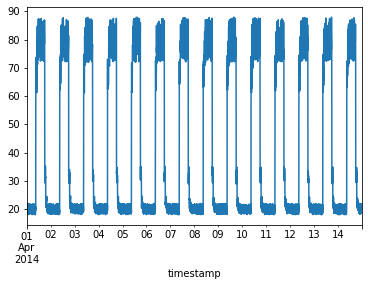

In [6]:
fig, ax = plt.subplots()
df_small_noise.plot(legend=False, ax=ax)
plt.show()

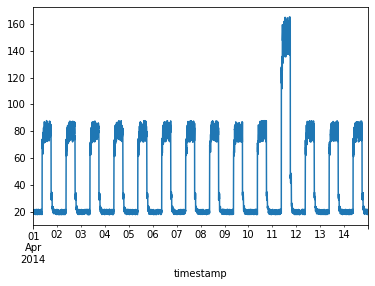

In [7]:
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.show()

In [9]:
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples: ", len(df_training_value))

Number of training samples:  4032


In [10]:
TIME_STEPS = 288
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i: (i + time_steps)])
    return np.stack(output)

x_train = create_sequences(df_training_value.values)
print("Training input shape:", x_train.shape)

Training input shape: (3745, 288, 1)


In [13]:
model = keras.Sequential([
    layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
    layers.Conv1D(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
    layers.Dropout(rate=0.2),
    layers.Conv1D(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
    layers.Conv1DTranspose(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
    layers.Dropout(rate=0.2),
    layers.Conv1DTranspose(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
    layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same")
])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 144, 32)           256       
                                                                 
 dropout_2 (Dropout)         (None, 144, 32)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose_3 (Conv1DT  (None, 144, 16)          1808      
 ranspose)                                                       
                                                                 
 dropout_3 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_4 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                            

In [15]:
history = model.fit(x_train, x_train, epochs=50, batch_size=128, validation_split=0.1, 
                    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")])

Epoch 1/50
27/27 [==============================] - 4s 103ms/step - loss: 0.4935 - val_loss: 0.0921
Epoch 2/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0752 - val_loss: 0.0407
Epoch 3/50
27/27 [==============================] - 2s 86ms/step - loss: 0.0564 - val_loss: 0.0359
Epoch 4/50
27/27 [==============================] - 2s 86ms/step - loss: 0.0479 - val_loss: 0.0297
Epoch 5/50
27/27 [==============================] - 2s 85ms/step - loss: 0.0422 - val_loss: 0.0268
Epoch 6/50
27/27 [==============================] - 2s 85ms/step - loss: 0.0380 - val_loss: 0.0247
Epoch 7/50
27/27 [==============================] - 2s 85ms/step - loss: 0.0349 - val_loss: 0.0227
Epoch 8/50
27/27 [==============================] - 2s 83ms/step - loss: 0.0322 - val_loss: 0.0227
Epoch 9/50
27/27 [==============================] - 2s 86ms/step - loss: 0.0302 - val_loss: 0.0218
Epoch 10/50
27/27 [==============================] - 2s 85ms/step - loss: 0.0287 - val_loss: 0.0202
Epoch 11

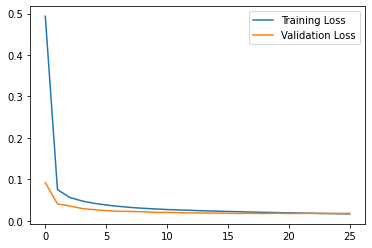

In [16]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

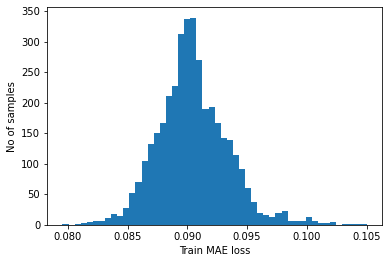

Reconstruction error threshold:  0.10501689902286221


In [17]:
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

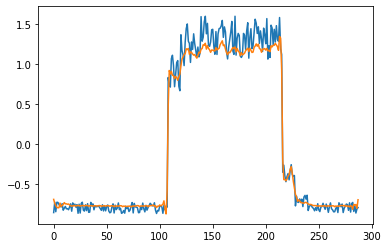

In [19]:
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

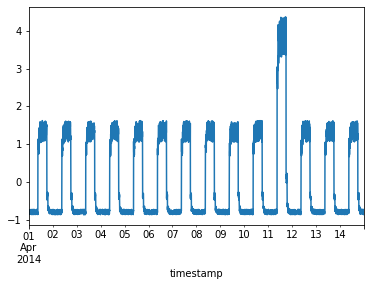

Test input shape: (3745, 288, 1)


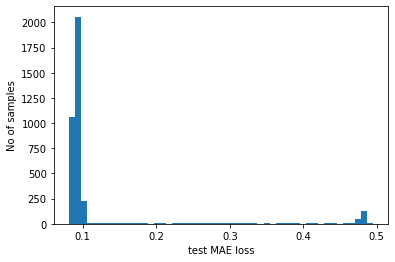

Number of anomaly samples: 403
Indices of anomaly samples:  (array([1654, 1657, 1658, 1833, 2521, 2522, 2523, 2697, 2701, 2702, 2703,
       2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714,
       2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724, 2725,
       2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736,
       2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747,
       2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758,
       2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769,
       2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780,
       2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791,
       2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802,
       2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813,
       2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824,
       2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832, 2833, 28

In [20]:
df_test_value = (df_daily_jumpsup - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

x_test = create_sequences(df_test_value.values)
print("Test input shape:", x_test.shape)

x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

anomalies = test_mae_loss > threshold
print("Number of anomaly samples:", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

In [22]:
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

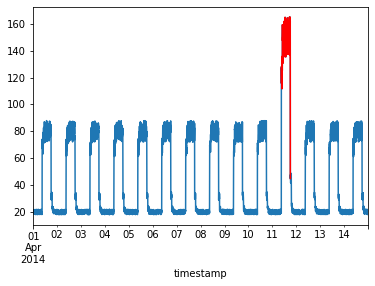

In [24]:
df_subset = df_daily_jumpsup.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

# Project 59

In [26]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")


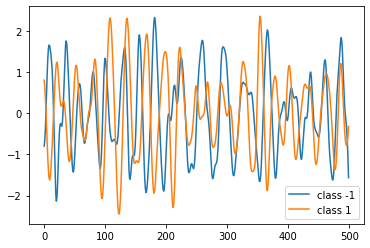

In [29]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))
plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [30]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [31]:
num_classes = len(np.unique(y_train))

In [32]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [34]:
y_train[y_train == -1] = 0
y_test[y_test ==-1] = 0

In [37]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)
    
    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)
    
    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)
    
    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)
    
    gap = keras.layers.GlobalAveragePooling1D()(conv3)
    
    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)
    
    return keras.models.Model(inputs=input_layer, outputs=output_layer)
model = make_model(input_shape=x_train.shape[1:])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 500, 1)]          0         
                                                                 
 conv1d_7 (Conv1D)           (None, 500, 64)           256       
                                                                 
 batch_normalization_2 (Batc  (None, 500, 64)          256       
 hNormalization)                                                 
                                                                 
 re_lu_2 (ReLU)              (None, 500, 64)           0         
                                                                 
 conv1d_8 (Conv1D)           (None, 500, 64)           12352     
                                                                 
 batch_normalization_3 (Batc  (None, 500, 64)          256       
 hNormalization)                                             

In [38]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1)
]
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=callbacks, 
                    validation_split=0.2, verbose=1)

Epoch 1/500
90/90 [==============================] - 15s 146ms/step - loss: 0.5558 - sparse_categorical_accuracy: 0.6969 - val_loss: 0.7778 - val_sparse_categorical_accuracy: 0.5090 - lr: 0.0010
Epoch 2/500
90/90 [==============================] - 13s 143ms/step - loss: 0.4674 - sparse_categorical_accuracy: 0.7684 - val_loss: 0.7177 - val_sparse_categorical_accuracy: 0.5090 - lr: 0.0010
Epoch 3/500
90/90 [==============================] - 13s 142ms/step - loss: 0.4327 - sparse_categorical_accuracy: 0.7924 - val_loss: 0.7237 - val_sparse_categorical_accuracy: 0.5104 - lr: 0.0010
Epoch 4/500
90/90 [==============================] - 13s 142ms/step - loss: 0.4137 - sparse_categorical_accuracy: 0.7986 - val_loss: 0.6384 - val_sparse_categorical_accuracy: 0.6574 - lr: 0.0010
Epoch 5/500
90/90 [==============================] - 13s 142ms/step - loss: 0.4036 - sparse_categorical_accuracy: 0.8049 - val_loss: 0.6614 - val_sparse_categorical_accuracy: 0.6255 - lr: 0.0010
Epoch 6/500
90/90 [======

Epoch 43/500
90/90 [==============================] - 13s 143ms/step - loss: 0.2381 - sparse_categorical_accuracy: 0.8986 - val_loss: 0.2792 - val_sparse_categorical_accuracy: 0.8890 - lr: 0.0010
Epoch 44/500
90/90 [==============================] - 13s 141ms/step - loss: 0.2411 - sparse_categorical_accuracy: 0.9024 - val_loss: 0.3613 - val_sparse_categorical_accuracy: 0.8460 - lr: 0.0010
Epoch 45/500
90/90 [==============================] - 13s 141ms/step - loss: 0.2437 - sparse_categorical_accuracy: 0.9003 - val_loss: 0.3716 - val_sparse_categorical_accuracy: 0.8155 - lr: 0.0010
Epoch 46/500
90/90 [==============================] - 13s 143ms/step - loss: 0.2246 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.2929 - val_sparse_categorical_accuracy: 0.8433 - lr: 0.0010
Epoch 47/500
90/90 [==============================] - 13s 143ms/step - loss: 0.2300 - sparse_categorical_accuracy: 0.9094 - val_loss: 0.3752 - val_sparse_categorical_accuracy: 0.8294 - lr: 0.0010
Epoch 48/500
90/90 [

Epoch 85/500
90/90 [==============================] - 13s 141ms/step - loss: 0.1028 - sparse_categorical_accuracy: 0.9604 - val_loss: 0.1623 - val_sparse_categorical_accuracy: 0.9404 - lr: 0.0010
Epoch 86/500
90/90 [==============================] - 13s 142ms/step - loss: 0.1153 - sparse_categorical_accuracy: 0.9597 - val_loss: 0.3095 - val_sparse_categorical_accuracy: 0.8280 - lr: 0.0010
Epoch 87/500
90/90 [==============================] - 13s 142ms/step - loss: 0.1051 - sparse_categorical_accuracy: 0.9646 - val_loss: 0.3186 - val_sparse_categorical_accuracy: 0.8516 - lr: 0.0010
Epoch 88/500
90/90 [==============================] - 13s 142ms/step - loss: 0.1088 - sparse_categorical_accuracy: 0.9628 - val_loss: 0.2137 - val_sparse_categorical_accuracy: 0.9168 - lr: 0.0010
Epoch 89/500
90/90 [==============================] - 13s 141ms/step - loss: 0.1073 - sparse_categorical_accuracy: 0.9601 - val_loss: 0.1667 - val_sparse_categorical_accuracy: 0.9431 - lr: 0.0010
Epoch 90/500
90/90 [

Epoch 127/500
90/90 [==============================] - 13s 142ms/step - loss: 0.0754 - sparse_categorical_accuracy: 0.9736 - val_loss: 0.1161 - val_sparse_categorical_accuracy: 0.9570 - lr: 5.0000e-04
Epoch 128/500
90/90 [==============================] - 13s 142ms/step - loss: 0.0826 - sparse_categorical_accuracy: 0.9705 - val_loss: 0.3273 - val_sparse_categorical_accuracy: 0.8530 - lr: 5.0000e-04
Epoch 129/500
90/90 [==============================] - 12s 137ms/step - loss: 0.0798 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.3423 - val_sparse_categorical_accuracy: 0.8585 - lr: 5.0000e-04
Epoch 130/500
90/90 [==============================] - 13s 141ms/step - loss: 0.0814 - sparse_categorical_accuracy: 0.9701 - val_loss: 0.0925 - val_sparse_categorical_accuracy: 0.9667 - lr: 5.0000e-04
Epoch 131/500
90/90 [==============================] - 13s 143ms/step - loss: 0.0820 - sparse_categorical_accuracy: 0.9705 - val_loss: 0.0888 - val_sparse_categorical_accuracy: 0.9778 - lr: 5.0000

Epoch 168/500
90/90 [==============================] - 10s 109ms/step - loss: 0.0613 - sparse_categorical_accuracy: 0.9778 - val_loss: 0.1012 - val_sparse_categorical_accuracy: 0.9626 - lr: 2.5000e-04
Epoch 169/500
90/90 [==============================] - 9s 101ms/step - loss: 0.0614 - sparse_categorical_accuracy: 0.9806 - val_loss: 0.0822 - val_sparse_categorical_accuracy: 0.9723 - lr: 2.5000e-04
Epoch 170/500
90/90 [==============================] - 9s 105ms/step - loss: 0.0644 - sparse_categorical_accuracy: 0.9795 - val_loss: 0.0982 - val_sparse_categorical_accuracy: 0.9653 - lr: 2.5000e-04
Epoch 171/500
90/90 [==============================] - 9s 102ms/step - loss: 0.0619 - sparse_categorical_accuracy: 0.9785 - val_loss: 0.0894 - val_sparse_categorical_accuracy: 0.9736 - lr: 2.5000e-04
Epoch 172/500
90/90 [==============================] - 9s 104ms/step - loss: 0.0645 - sparse_categorical_accuracy: 0.9785 - val_loss: 0.0866 - val_sparse_categorical_accuracy: 0.9709 - lr: 2.5000e-04

Epoch 209/500
90/90 [==============================] - 9s 104ms/step - loss: 0.0549 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.0881 - val_sparse_categorical_accuracy: 0.9709 - lr: 1.0000e-04
Epoch 210/500
90/90 [==============================] - 10s 107ms/step - loss: 0.0564 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0878 - val_sparse_categorical_accuracy: 0.9695 - lr: 1.0000e-04
Epoch 211/500
90/90 [==============================] - 10s 108ms/step - loss: 0.0526 - sparse_categorical_accuracy: 0.9819 - val_loss: 0.0828 - val_sparse_categorical_accuracy: 0.9723 - lr: 1.0000e-04
Epoch 212/500
90/90 [==============================] - 10s 110ms/step - loss: 0.0550 - sparse_categorical_accuracy: 0.9809 - val_loss: 0.1049 - val_sparse_categorical_accuracy: 0.9626 - lr: 1.0000e-04
Epoch 213/500
90/90 [==============================] - 10s 109ms/step - loss: 0.0534 - sparse_categorical_accuracy: 0.9861 - val_loss: 0.0897 - val_sparse_categorical_accuracy: 0.9681 - lr: 1.0000e

In [39]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy", test_acc)
print("Test loss", test_loss)

42/42 [==============================] - 1s 19ms/step - loss: 0.0938 - sparse_categorical_accuracy: 0.9705
Test accuracy 0.9704545736312866
Test loss 0.09382760524749756


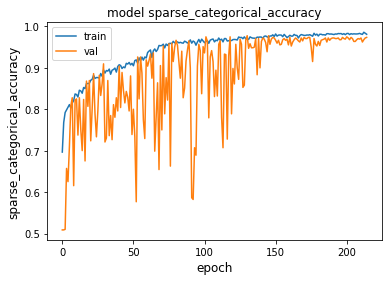

In [42]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_"+metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

# Project 60

In [43]:
import numpy as np
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)

root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

n_classes = len(np.unique(y_train))
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [44]:
from tensorflow import keras
from tensorflow.keras import layers

In [45]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs
    
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [46]:
def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, 
                dropout=0, mlp_dropout=9):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [47]:
input_shape = x_train.shape[1:]
model = build_model(input_shape, head_size=256, num_heads=4, ff_dim=4, num_transformer_blocks=4, mlp_units=[128], 
                   mlp_dropout=0.4, dropout=0.25)
model.compile(loss = "sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-4), 
             metrics=["sparse_categorical_accuracy"])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 500, 1)]     0           []                               
                                                                                                  
 multi_head_attention (MultiHea  (None, 500, 1)      7169        ['input_6[0][0]',                
 dAttention)                                                      'input_6[0][0]']                
                                                                                                  
 dropout_4 (Dropout)            (None, 500, 1)       0           ['multi_head_attention[0][0]']   
                                                                                                  
 layer_normalization (LayerNorm  (None, 500, 1)      2           ['dropout_4[0][0]']        

 mbda)                                                            'tf.__operators__.add_5[0][0]'] 
                                                                                                  
 conv1d_16 (Conv1D)             (None, 500, 4)       8           ['tf.__operators__.add_6[0][0]'] 
                                                                                                  
 dropout_11 (Dropout)           (None, 500, 4)       0           ['conv1d_16[0][0]']              
                                                                                                  
 conv1d_17 (Conv1D)             (None, 500, 1)       5           ['dropout_11[0][0]']             
                                                                                                  
 layer_normalization_7 (LayerNo  (None, 500, 1)      2           ['conv1d_17[0][0]']              
 rmalization)                                                                                     
          

In [48]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=64, callbacks=callbacks)
model.evaluate(x_test, y_test, verbose=1)

Epoch 1/200
45/45 [==============================] - 1461s 32s/step - loss: 0.9097 - sparse_categorical_accuracy: 0.5184 - val_loss: 0.7070 - val_sparse_categorical_accuracy: 0.5659
Epoch 2/200
45/45 [==============================] - 1125s 25s/step - loss: 0.8045 - sparse_categorical_accuracy: 0.5583 - val_loss: 0.6496 - val_sparse_categorical_accuracy: 0.6172
Epoch 3/200
45/45 [==============================] - 1054s 23s/step - loss: 0.7539 - sparse_categorical_accuracy: 0.5934 - val_loss: 0.6067 - val_sparse_categorical_accuracy: 0.6768
Epoch 4/200
45/45 [==============================] - 1066s 24s/step - loss: 0.7003 - sparse_categorical_accuracy: 0.6295 - val_loss: 0.5828 - val_sparse_categorical_accuracy: 0.7032
Epoch 5/200
45/45 [==============================] - 1066s 24s/step - loss: 0.6640 - sparse_categorical_accuracy: 0.6438 - val_loss: 0.5660 - val_sparse_categorical_accuracy: 0.7184
Epoch 6/200
45/45 [==============================] - 1088s 24s/step - loss: 0.6317 - spars

Epoch 46/200
45/45 [==============================] - 1090s 24s/step - loss: 0.3153 - sparse_categorical_accuracy: 0.8764 - val_loss: 0.3722 - val_sparse_categorical_accuracy: 0.8391
Epoch 47/200
45/45 [==============================] - 1083s 24s/step - loss: 0.3119 - sparse_categorical_accuracy: 0.8792 - val_loss: 0.3687 - val_sparse_categorical_accuracy: 0.8447
Epoch 48/200
45/45 [==============================] - 1074s 24s/step - loss: 0.3111 - sparse_categorical_accuracy: 0.8819 - val_loss: 0.3668 - val_sparse_categorical_accuracy: 0.8474
Epoch 49/200
45/45 [==============================] - 1082s 24s/step - loss: 0.3091 - sparse_categorical_accuracy: 0.8802 - val_loss: 0.3654 - val_sparse_categorical_accuracy: 0.8447
Epoch 50/200
45/45 [==============================] - 1094s 24s/step - loss: 0.3094 - sparse_categorical_accuracy: 0.8826 - val_loss: 0.3641 - val_sparse_categorical_accuracy: 0.8419
Epoch 51/200
45/45 [==============================] - 1081s 24s/step - loss: 0.3023 -

Epoch 91/200
45/45 [==============================] - 1092s 24s/step - loss: 0.1991 - sparse_categorical_accuracy: 0.9326 - val_loss: 0.3108 - val_sparse_categorical_accuracy: 0.8696
Epoch 92/200
45/45 [==============================] - 1100s 24s/step - loss: 0.1970 - sparse_categorical_accuracy: 0.9333 - val_loss: 0.3092 - val_sparse_categorical_accuracy: 0.8710
Epoch 93/200
45/45 [==============================] - 1111s 25s/step - loss: 0.1999 - sparse_categorical_accuracy: 0.9271 - val_loss: 0.3125 - val_sparse_categorical_accuracy: 0.8738
Epoch 94/200
45/45 [==============================] - 1094s 24s/step - loss: 0.1980 - sparse_categorical_accuracy: 0.9326 - val_loss: 0.3109 - val_sparse_categorical_accuracy: 0.8696
Epoch 95/200
45/45 [==============================] - 1082s 24s/step - loss: 0.1919 - sparse_categorical_accuracy: 0.9344 - val_loss: 0.3101 - val_sparse_categorical_accuracy: 0.8752
Epoch 96/200
45/45 [==============================] - 1089s 24s/step - loss: 0.1930 -

[0.35054564476013184, 0.8484848737716675]